In [1]:
import pandas as pd
from collections import defaultdict
import warnings
import visualize
import neat
import multiprocessing
import os
import matplotlib.pyplot as plt

import numpy as np

from sklearn.datasets import load_digits
digits = load_digits()

In [2]:
X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[:1617]
y = digits.target[:1617]

In [3]:
necoc = 100
generations = int(3000/necoc)
generations

30

In [4]:
def softmax(x, axis=1):
    # 计算每行的最大值
    row_max = x.max(axis=axis)
 
    # 每行元素都需要减去对应的最大值，否则求exp(x)会溢出，导致inf情况
    row_max=row_max.reshape(-1, 1)
    x = x - row_max
 
    # 计算e的指数次幂
    x_exp = np.exp(x)
    x_sum = np.sum(x_exp, axis=axis, keepdims=True)
    s = x_exp / x_sum
    return s

In [5]:
def get_winner(class1):
    
    numbers = [*range(10)] # number 2 > number 1
    number_of_classification = len(numbers)
    #number_of_sampling = 100

    list_y = y.tolist()
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

        
    class2 = []

    class1_indexes = []
    class2_indexes = []

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)

    print("number of class1:{}".format(len(class1_label)))
    print("number of class2:{}".format(len(class2_label)))

    samplesize = 1617
    x_inputs =[tuple(c) for c in X[class1_indexes].tolist()] + [tuple(c) for c in X[class2_indexes].tolist()]
    x_outputs = [tuple([c]) for c in class1_label + class2_label]
    
    
    def eval_genomes(genomes, config):
        for genome_id, genome in genomes:
            net = neat.nn.FeedForwardNetwork.create(genome, config)

            outputs = []
            for xi in x_inputs:
                output = net.activate(xi)
                outputs.append(output)


            px_outputs = softmax(np.array(outputs).reshape(samplesize, 2), axis=1)
            # the index of maximum in each line
            pred_outputs = np.argmax(px_outputs, axis = 1)
            real_outputs = np.array(x_outputs).reshape(samplesize,)

            acc = np.sum(pred_outputs == real_outputs)/samplesize

            genome.fitness = acc

    def run(config_file):
        # Load configuration.
        config = neat.Config(
            neat.DefaultGenome,
            neat.DefaultReproduction,
            neat.DefaultSpeciesSet,
            neat.DefaultStagnation,
            config_file,
        )

        # Create the population, which is the top-level object for a NEAT run.
        p = neat.Population(config)

        # add a stdout reporter to show progress in the terminal
        reporter = neat.StdOutReporter(False)
        p.add_reporter(reporter)
        stats = neat.StatisticsReporter()
        p.add_reporter(stats)
        #checkpointer = neat.Checkpointer(100)
        #p.add_reporter(checkpointer)
        # Run for up to 300 generations.
        winner = p.run(eval_genomes, generations)

        return [stats, winner]
    
    local_dir = os.getcwd()
    config_path = os.path.join(local_dir, "config-feedforward-mnist2")
    [stats, winner] = run(config_path)
    
    return winner

In [6]:
import numpy as np
import random
while True:
    number_codes = []
    for i in range(2**(10-1), 2**10-1):
        for j in bin(i).split('b')[1]:
            number_codes.append(int(j))
    number_codes = np.array(number_codes).reshape(2**9 - 1,10).T     

    slice = random.sample(range(511), necoc)

    number_codes = number_codes[:,slice].tolist()

    classes = []
    for i in range(necoc):
        code_list = np.array(number_codes).T[i]
        classes.append(np.where(code_list==1)[0].tolist())

    matrix_errors = []

    for i in range(9):
        for j in range(i+1,10):
            matrix_errors.append(necoc - np.sum(np.array(number_codes[i]) == np.array(number_codes[j])))
    min_error = np.min(matrix_errors)
    if min_error != 0:
        print(min_error)
        #print(number_codes)
        break

42


In [7]:
len(number_codes[0])

100

In [8]:
winner_list = []

for i,class1 in enumerate(classes):
    print("running:{}/100".format(i))
    winner = get_winner(class1)
    winner_list.append(winner)

running:0/100
number of class1:971
number of class2:646

 ****** Running generation 0 ****** 

Population's average fitness: 0.48021 stdev: 0.09168
Best fitness: 0.72171 - size: (2, 13) - species 2 - id 44
Average adjusted fitness: 0.197
Mean genetic distance 2.924, standard deviation 0.491
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 7.888 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53967 stdev: 0.08710
Best fitness: 0.72171 - size: (2, 13) - species 2 - id 44
Average adjusted fitness: 0.199
Mean genetic distance 3.028, standard deviation 0.482
Population of 200 members in 33 species
Total extinctions: 0
Generation time: 6.704 sec (7.296 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56194 stdev: 0.09014
Best fitness: 0.73160 - size: (3, 14) - species 7 - id 525
Average adjusted fitness: 0.207
Mean genetic distance 3.096, standard deviation 0.483
Population of 203 members in 34 species
Tot

Population's average fitness: 0.63429 stdev: 0.10209
Best fitness: 0.78788 - size: (4, 18) - species 51 - id 2254
Average adjusted fitness: 0.270
Mean genetic distance 3.365, standard deviation 0.448
Population of 203 members in 39 species
Total extinctions: 0
Generation time: 6.640 sec (6.423 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.62727 stdev: 0.10626
Best fitness: 0.78788 - size: (4, 18) - species 51 - id 2254
Average adjusted fitness: 0.281
Mean genetic distance 3.355, standard deviation 0.469
Population of 199 members in 37 species
Total extinctions: 0
Generation time: 6.905 sec (6.489 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.62845 stdev: 0.10135
Best fitness: 0.78788 - size: (4, 18) - species 51 - id 2254
Average adjusted fitness: 0.292
Mean genetic distance 3.378, standard deviation 0.473
Population of 201 members in 35 species
Total extinctions: 0
Generation time: 6.824 sec (6.538 average)

 ******


Population's average fitness: 0.65542 stdev: 0.12191
Best fitness: 0.79035 - size: (4, 15) - species 23 - id 2087
Average adjusted fitness: 0.350
Mean genetic distance 3.128, standard deviation 0.513
Population of 198 members in 34 species
Total extinctions: 0
Generation time: 6.065 sec (6.321 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.64125 stdev: 0.13383
Best fitness: 0.79035 - size: (4, 15) - species 23 - id 2087
Average adjusted fitness: 0.353
Mean genetic distance 3.144, standard deviation 0.525
Population of 203 members in 33 species
Total extinctions: 0
Generation time: 6.375 sec (6.335 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.65620 stdev: 0.12242
Best fitness: 0.79035 - size: (4, 15) - species 23 - id 2087
Average adjusted fitness: 0.364
Mean genetic distance 3.189, standard deviation 0.510
Population of 198 members in 31 species
Total extinctions: 0
Generation time: 6.610 sec (6.382 average)

 *****

Population of 205 members in 41 species
Total extinctions: 0
Generation time: 6.341 sec (6.044 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.60063 stdev: 0.09203
Best fitness: 0.73655 - size: (2, 13) - species 20 - id 72
Average adjusted fitness: 0.230
Mean genetic distance 3.133, standard deviation 0.504
Population of 204 members in 42 species
Total extinctions: 0
Generation time: 6.647 sec (6.152 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.60866 stdev: 0.08399
Best fitness: 0.73655 - size: (2, 13) - species 20 - id 72
Average adjusted fitness: 0.240
Mean genetic distance 3.146, standard deviation 0.505
Population of 208 members in 42 species
Total extinctions: 0
Generation time: 6.600 sec (6.250 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.59893 stdev: 0.09007
Best fitness: 0.73655 - size: (2, 13) - species 20 - id 72
Average adjusted fitness: 0.208
Mean genetic distance 3.190,

Population of 202 members in 41 species
Total extinctions: 0
Generation time: 5.946 sec (5.594 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.57764 stdev: 0.09657
Best fitness: 0.78850 - size: (3, 14) - species 5 - id 245
Average adjusted fitness: 0.238
Mean genetic distance 3.144, standard deviation 0.446
Population of 202 members in 41 species
Total extinctions: 0
Generation time: 6.079 sec (5.655 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.59068 stdev: 0.09393
Best fitness: 0.78850 - size: (3, 14) - species 5 - id 245
Average adjusted fitness: 0.296
Mean genetic distance 3.163, standard deviation 0.452
Population of 203 members in 43 species
Total extinctions: 0
Generation time: 6.141 sec (5.709 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.59127 stdev: 0.09081
Best fitness: 0.78850 - size: (3, 14) - species 5 - id 245
Average adjusted fitness: 0.220
Mean genetic distance 3.201, st

Population's average fitness: 0.53691 stdev: 0.10001
Best fitness: 0.73902 - size: (2, 13) - species 2 - id 92
Average adjusted fitness: 0.262
Mean genetic distance 3.085, standard deviation 0.497
Population of 201 members in 33 species
Total extinctions: 0
Generation time: 5.109 sec (4.940 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56856 stdev: 0.08796
Best fitness: 0.73902 - size: (2, 13) - species 2 - id 92
Average adjusted fitness: 0.202
Mean genetic distance 3.083, standard deviation 0.476
Population of 200 members in 36 species
Total extinctions: 0
Generation time: 5.323 sec (5.068 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.57305 stdev: 0.09532
Best fitness: 0.77304 - size: (3, 17) - species 23 - id 662
Average adjusted fitness: 0.202
Mean genetic distance 3.101, standard deviation 0.492
Population of 207 members in 38 species
Total extinctions: 0
Generation time: 5.396 sec (5.150 average)

 ****** Running 

Population of 199 members in 35 species
Total extinctions: 0
Generation time: 6.480 sec (6.244 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.63045 stdev: 0.11689
Best fitness: 0.81633 - size: (6, 23) - species 33 - id 3309
Average adjusted fitness: 0.298
Mean genetic distance 3.255, standard deviation 0.506
Population of 195 members in 35 species
Total extinctions: 0
Generation time: 6.658 sec (6.301 average)

 ****** Running generation 27 ****** 

Population's average fitness: 0.63774 stdev: 0.10681
Best fitness: 0.81633 - size: (6, 23) - species 33 - id 3309
Average adjusted fitness: 0.253
Mean genetic distance 3.238, standard deviation 0.497
Population of 191 members in 33 species
Total extinctions: 0
Generation time: 8.021 sec (6.491 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.63407 stdev: 0.11105
Best fitness: 0.81633 - size: (6, 23) - species 33 - id 3309
Average adjusted fitness: 0.294
Mean genetic distance 

Generation time: 6.391 sec (6.184 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.72885 stdev: 0.18955
Best fitness: 0.91775 - size: (3, 18) - species 21 - id 2945
Average adjusted fitness: 0.537
Mean genetic distance 3.241, standard deviation 0.510
Population of 199 members in 28 species
Total extinctions: 0
Generation time: 6.416 sec (6.229 average)

 ****** Running generation 21 ****** 

Population's average fitness: 0.74680 stdev: 0.17644
Best fitness: 0.91775 - size: (3, 18) - species 21 - id 2945
Average adjusted fitness: 0.550
Mean genetic distance 3.257, standard deviation 0.511
Population of 193 members in 27 species
Total extinctions: 0
Generation time: 6.455 sec (6.274 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.74373 stdev: 0.18551
Best fitness: 0.91775 - size: (3, 18) - species 21 - id 2945
Average adjusted fitness: 0.545
Mean genetic distance 3.247, standard deviation 0.507
Population of 197 members in 

Generation time: 6.252 sec (5.887 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.72189 stdev: 0.16730
Best fitness: 0.83179 - size: (5, 18) - species 14 - id 1011
Average adjusted fitness: 0.508
Mean genetic distance 3.176, standard deviation 0.514
Population of 205 members in 38 species
Total extinctions: 0
Generation time: 6.143 sec (5.948 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.70924 stdev: 0.18484
Best fitness: 0.83179 - size: (5, 18) - species 14 - id 1011
Average adjusted fitness: 0.502
Mean genetic distance 3.224, standard deviation 0.518
Population of 197 members in 37 species
Total extinctions: 0
Generation time: 6.110 sec (6.000 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.70428 stdev: 0.19374
Best fitness: 0.83179 - size: (5, 18) - species 14 - id 1011
Average adjusted fitness: 0.494
Mean genetic distance 3.250, standard deviation 0.514
Population of 202 members in 

Total extinctions: 0
Generation time: 5.890 sec (5.456 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.61427 stdev: 0.10312
Best fitness: 0.83364 - size: (4, 17) - species 24 - id 930
Average adjusted fitness: 0.247
Mean genetic distance 3.225, standard deviation 0.486
Population of 205 members in 39 species
Total extinctions: 0
Generation time: 5.936 sec (5.510 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.61315 stdev: 0.10012
Best fitness: 0.83364 - size: (4, 17) - species 24 - id 930
Average adjusted fitness: 0.195
Mean genetic distance 3.225, standard deviation 0.497
Population of 199 members in 39 species
Total extinctions: 0
Generation time: 6.197 sec (5.578 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.61986 stdev: 0.10808
Best fitness: 0.83364 - size: (4, 17) - species 24 - id 930
Average adjusted fitness: 0.324
Mean genetic distance 3.228, standard deviation 0.491
Population of


Population's average fitness: 0.57279 stdev: 0.10893
Best fitness: 0.80272 - size: (4, 15) - species 1 - id 514
Average adjusted fitness: 0.196
Mean genetic distance 3.078, standard deviation 0.511
Population of 202 members in 30 species
Total extinctions: 0
Generation time: 5.241 sec (5.059 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.58703 stdev: 0.10300
Best fitness: 0.80272 - size: (4, 15) - species 1 - id 514
Average adjusted fitness: 0.263
Mean genetic distance 3.087, standard deviation 0.521
Population of 201 members in 31 species
Total extinctions: 0
Generation time: 5.522 sec (5.174 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.59527 stdev: 0.09884
Best fitness: 0.80334 - size: (5, 17) - species 1 - id 815
Average adjusted fitness: 0.282
Mean genetic distance 3.117, standard deviation 0.507
Population of 204 members in 33 species
Total extinctions: 0
Generation time: 5.506 sec (5.241 average)

 ****** Runnin

Population's average fitness: 0.62865 stdev: 0.11720
Best fitness: 0.82560 - size: (8, 22) - species 1 - id 3035
Average adjusted fitness: 0.244
Mean genetic distance 3.333, standard deviation 0.502
Population of 196 members in 31 species
Total extinctions: 0
Generation time: 7.067 sec (6.791 average)

 ****** Running generation 27 ****** 

Population's average fitness: 0.64531 stdev: 0.10811
Best fitness: 0.82560 - size: (8, 22) - species 1 - id 3035
Average adjusted fitness: 0.279
Mean genetic distance 3.350, standard deviation 0.506
Population of 193 members in 30 species
Total extinctions: 0
Generation time: 7.196 sec (6.898 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.63933 stdev: 0.11466
Best fitness: 0.82560 - size: (8, 22) - species 1 - id 3035
Average adjusted fitness: 0.284
Mean genetic distance 3.356, standard deviation 0.502
Population of 197 members in 30 species
Total extinctions: 0
Generation time: 7.108 sec (6.930 average)

 ****** Ru

Mean genetic distance 3.258, standard deviation 0.483
Population of 194 members in 39 species
Total extinctions: 0
Generation time: 6.496 sec (6.885 average)

 ****** Running generation 21 ****** 

Population's average fitness: 0.62065 stdev: 0.09029
Best fitness: 0.76190 - size: (7, 22) - species 24 - id 2097
Average adjusted fitness: 0.248
Mean genetic distance 3.276, standard deviation 0.492
Population of 194 members in 37 species
Total extinctions: 0
Generation time: 8.673 sec (7.134 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.61151 stdev: 0.10233
Best fitness: 0.76190 - size: (7, 22) - species 24 - id 2097
Average adjusted fitness: 0.263
Mean genetic distance 3.278, standard deviation 0.494
Population of 198 members in 36 species
Total extinctions: 0
Generation time: 8.023 sec (7.308 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.61280 stdev: 0.09900
Best fitness: 0.76190 - size: (7, 22) - species 24 - id 2097


Mean genetic distance 3.142, standard deviation 0.470
Population of 202 members in 46 species
Total extinctions: 0
Generation time: 6.333 sec (5.949 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.61889 stdev: 0.10587
Best fitness: 0.78973 - size: (4, 16) - species 38 - id 2014
Average adjusted fitness: 0.238
Mean genetic distance 3.158, standard deviation 0.474
Population of 196 members in 45 species
Total extinctions: 0
Generation time: 6.303 sec (6.021 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.62444 stdev: 0.10369
Best fitness: 0.78973 - size: (4, 16) - species 38 - id 2014
Average adjusted fitness: 0.314
Mean genetic distance 3.209, standard deviation 0.482
Population of 192 members in 40 species
Total extinctions: 0
Generation time: 6.184 sec (6.070 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.62786 stdev: 0.11045
Best fitness: 0.79901 - size: (5, 18) - species 38 - id 2250


Total extinctions: 0
Generation time: 5.873 sec (5.606 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.60356 stdev: 0.09517
Best fitness: 0.78169 - size: (4, 17) - species 10 - id 649
Average adjusted fitness: 0.250
Mean genetic distance 3.279, standard deviation 0.515
Population of 205 members in 46 species
Total extinctions: 0
Generation time: 6.309 sec (5.676 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.60110 stdev: 0.09783
Best fitness: 0.78169 - size: (4, 17) - species 10 - id 649
Average adjusted fitness: 0.259
Mean genetic distance 3.281, standard deviation 0.521
Population of 200 members in 46 species
Total extinctions: 0
Generation time: 6.256 sec (5.819 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.60364 stdev: 0.09488
Best fitness: 0.78169 - size: (4, 17) - species 10 - id 649
Average adjusted fitness: 0.251
Mean genetic distance 3.264, standard deviation 0.511
Population o

Population's average fitness: 0.57132 stdev: 0.08099
Best fitness: 0.71429 - size: (4, 15) - species 3 - id 552
Average adjusted fitness: 0.199
Mean genetic distance 3.111, standard deviation 0.478
Population of 201 members in 39 species
Total extinctions: 0
Generation time: 5.434 sec (5.146 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.57609 stdev: 0.08371
Best fitness: 0.72727 - size: (5, 18) - species 20 - id 778
Average adjusted fitness: 0.183
Mean genetic distance 3.137, standard deviation 0.480
Population of 198 members in 40 species
Total extinctions: 0
Generation time: 5.698 sec (5.257 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.57607 stdev: 0.08887
Best fitness: 0.72727 - size: (5, 18) - species 20 - id 778
Average adjusted fitness: 0.223
Mean genetic distance 3.133, standard deviation 0.481
Population of 203 members in 40 species
Total extinctions: 0
Generation time: 5.615 sec (5.316 average)

 ****** Runni

Population's average fitness: 0.60774 stdev: 0.09902
Best fitness: 0.78046 - size: (6, 20) - species 43 - id 3206
Average adjusted fitness: 0.270
Mean genetic distance 3.166, standard deviation 0.519
Population of 202 members in 30 species
Total extinctions: 0
Generation time: 6.892 sec (6.296 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.60813 stdev: 0.09894
Best fitness: 0.78046 - size: (6, 20) - species 43 - id 3206
Average adjusted fitness: 0.298
Mean genetic distance 3.160, standard deviation 0.516
Population of 202 members in 30 species
Total extinctions: 0
Generation time: 9.012 sec (6.580 average)
running:13/100
number of class1:810
number of class2:807

 ****** Running generation 0 ****** 

Population's average fitness: 0.49599 stdev: 0.05199
Best fitness: 0.67038 - size: (2, 13) - species 1 - id 18
Average adjusted fitness: 0.196
Mean genetic distance 3.024, standard deviation 0.507
Population of 202 members in 28 species
Total extinctions: 

Total extinctions: 0
Generation time: 6.508 sec (6.289 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.58952 stdev: 0.08246
Best fitness: 0.76005 - size: (5, 20) - species 4 - id 2625
Average adjusted fitness: 0.196
Mean genetic distance 3.330, standard deviation 0.516
Population of 198 members in 34 species
Total extinctions: 0
Generation time: 6.581 sec (6.344 average)

 ****** Running generation 24 ****** 

Population's average fitness: 0.58877 stdev: 0.08180
Best fitness: 0.76005 - size: (5, 20) - species 4 - id 2625
Average adjusted fitness: 0.187
Mean genetic distance 3.335, standard deviation 0.517
Population of 192 members in 35 species
Total extinctions: 0
Generation time: 6.774 sec (6.397 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.59778 stdev: 0.07966
Best fitness: 0.76005 - size: (5, 20) - species 4 - id 2625
Average adjusted fitness: 0.229
Mean genetic distance 3.342, standard deviation 0.502
Population 

Population of 193 members in 44 species
Total extinctions: 0
Generation time: 6.139 sec (6.103 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.64218 stdev: 0.10859
Best fitness: 0.83735 - size: (5, 19) - species 27 - id 1668
Average adjusted fitness: 0.262
Mean genetic distance 3.247, standard deviation 0.474
Population of 197 members in 43 species
Total extinctions: 0
Generation time: 7.033 sec (6.223 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.64420 stdev: 0.11560
Best fitness: 0.83735 - size: (5, 19) - species 27 - id 1668
Average adjusted fitness: 0.326
Mean genetic distance 3.252, standard deviation 0.468
Population of 196 members in 42 species
Total extinctions: 0
Generation time: 7.567 sec (6.407 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.65236 stdev: 0.11053
Best fitness: 0.83735 - size: (5, 19) - species 27 - id 1668
Average adjusted fitness: 0.297
Mean genetic distance 

Population of 198 members in 44 species
Total extinctions: 0
Generation time: 6.065 sec (5.745 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.72826 stdev: 0.15961
Best fitness: 0.84106 - size: (5, 17) - species 1 - id 1073
Average adjusted fitness: 0.516
Mean genetic distance 3.196, standard deviation 0.484
Population of 199 members in 45 species
Total extinctions: 0
Generation time: 5.971 sec (5.832 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.71988 stdev: 0.17198
Best fitness: 0.84106 - size: (5, 17) - species 1 - id 1073
Average adjusted fitness: 0.496
Mean genetic distance 3.182, standard deviation 0.484
Population of 206 members in 45 species
Total extinctions: 0
Generation time: 6.070 sec (5.899 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.72329 stdev: 0.16820
Best fitness: 0.84106 - size: (5, 17) - species 1 - id 1073
Average adjusted fitness: 0.509
Mean genetic distance 3.1

Generation time: 5.585 sec (5.259 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.57338 stdev: 0.08278
Best fitness: 0.78417 - size: (5, 16) - species 20 - id 863
Average adjusted fitness: 0.205
Mean genetic distance 3.123, standard deviation 0.487
Population of 192 members in 41 species
Total extinctions: 0
Generation time: 5.613 sec (5.318 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.58236 stdev: 0.08916
Best fitness: 0.78417 - size: (5, 16) - species 20 - id 863
Average adjusted fitness: 0.243
Mean genetic distance 3.112, standard deviation 0.478
Population of 198 members in 42 species
Total extinctions: 0
Generation time: 6.343 sec (5.464 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.58902 stdev: 0.09028
Best fitness: 0.78417 - size: (5, 16) - species 20 - id 863
Average adjusted fitness: 0.271
Mean genetic distance 3.118, standard deviation 0.489
Population of 200 members in 43 spe

Total extinctions: 0
Generation time: 6.860 sec (6.397 average)
running:17/100
number of class1:808
number of class2:809

 ****** Running generation 0 ****** 

Population's average fitness: 0.49866 stdev: 0.06563
Best fitness: 0.72294 - size: (2, 13) - species 4 - id 145
Average adjusted fitness: 0.206
Mean genetic distance 2.940, standard deviation 0.534
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 4.819 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52514 stdev: 0.06267
Best fitness: 0.72356 - size: (3, 15) - species 25 - id 373
Average adjusted fitness: 0.165
Mean genetic distance 3.083, standard deviation 0.533
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 5.152 sec (4.985 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53994 stdev: 0.06469
Best fitness: 0.72356 - size: (3, 15) - species 25 - id 373
Average adjusted fitness: 0.210
Mean genetic distance 3.133,

Total extinctions: 0
Generation time: 6.355 sec (6.237 average)

 ****** Running generation 24 ****** 

Population's average fitness: 0.61910 stdev: 0.08391
Best fitness: 0.80952 - size: (4, 20) - species 25 - id 3237
Average adjusted fitness: 0.221
Mean genetic distance 3.224, standard deviation 0.480
Population of 205 members in 31 species
Total extinctions: 0
Generation time: 6.562 sec (6.271 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.60704 stdev: 0.08987
Best fitness: 0.80952 - size: (4, 20) - species 25 - id 3237
Average adjusted fitness: 0.231
Mean genetic distance 3.271, standard deviation 0.479
Population of 199 members in 31 species
Total extinctions: 0
Generation time: 7.773 sec (6.440 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.60816 stdev: 0.08890
Best fitness: 0.80952 - size: (4, 20) - species 25 - id 3237
Average adjusted fitness: 0.198
Mean genetic distance 3.250, standard deviation 0.487
Populati

Population of 194 members in 42 species
Total extinctions: 0
Generation time: 6.167 sec (6.031 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.59001 stdev: 0.07913
Best fitness: 0.74212 - size: (4, 19) - species 1 - id 1958
Average adjusted fitness: 0.176
Mean genetic distance 3.179, standard deviation 0.478
Population of 203 members in 41 species
Total extinctions: 0
Generation time: 6.098 sec (6.048 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.58871 stdev: 0.07969
Best fitness: 0.74212 - size: (4, 19) - species 1 - id 1958
Average adjusted fitness: 0.216
Mean genetic distance 3.199, standard deviation 0.478
Population of 196 members in 40 species
Total extinctions: 0
Generation time: 6.416 sec (6.075 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.59031 stdev: 0.07785
Best fitness: 0.74212 - size: (4, 19) - species 1 - id 1958
Average adjusted fitness: 0.181
Mean genetic distance 3.2

Total extinctions: 0
Generation time: 5.846 sec (5.687 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.58969 stdev: 0.07536
Best fitness: 0.72418 - size: (4, 17) - species 6 - id 1497
Average adjusted fitness: 0.252
Mean genetic distance 3.171, standard deviation 0.492
Population of 205 members in 42 species
Total extinctions: 0
Generation time: 6.032 sec (5.763 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.59616 stdev: 0.07653
Best fitness: 0.72418 - size: (4, 17) - species 38 - id 1497
Average adjusted fitness: 0.315
Mean genetic distance 3.154, standard deviation 0.495
Population of 201 members in 42 species
Total extinctions: 0
Generation time: 6.205 sec (5.828 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.59326 stdev: 0.07837
Best fitness: 0.72418 - size: (4, 17) - species 38 - id 1497
Average adjusted fitness: 0.183
Mean genetic distance 3.166, standard deviation 0.494
Populatio

Population's average fitness: 0.59440 stdev: 0.07802
Best fitness: 0.72047 - size: (5, 20) - species 20 - id 788
Average adjusted fitness: 0.235
Mean genetic distance 3.144, standard deviation 0.509
Population of 199 members in 36 species
Total extinctions: 0
Generation time: 6.013 sec (5.498 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.59133 stdev: 0.08416
Best fitness: 0.72047 - size: (5, 20) - species 20 - id 788
Average adjusted fitness: 0.244
Mean genetic distance 3.160, standard deviation 0.514
Population of 200 members in 37 species
Total extinctions: 0
Generation time: 5.787 sec (5.534 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.59807 stdev: 0.08243
Best fitness: 0.72047 - size: (5, 20) - species 20 - id 788
Average adjusted fitness: 0.226
Mean genetic distance 3.173, standard deviation 0.510
Population of 195 members in 38 species
Total extinctions: 0
Generation time: 5.889 sec (5.574 average)

 ****** Runn


 ****** Running generation 0 ****** 

Population's average fitness: 0.45498 stdev: 0.15826
Best fitness: 0.75634 - size: (2, 13) - species 1 - id 67
Average adjusted fitness: 0.209
Mean genetic distance 3.005, standard deviation 0.465
Population of 201 members in 32 species
Total extinctions: 0
Generation time: 4.794 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55219 stdev: 0.15478
Best fitness: 0.75634 - size: (2, 13) - species 1 - id 67
Average adjusted fitness: 0.288
Mean genetic distance 3.094, standard deviation 0.488
Population of 205 members in 34 species
Total extinctions: 0
Generation time: 5.149 sec (4.972 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58906 stdev: 0.14981
Best fitness: 0.77118 - size: (3, 16) - species 22 - id 515
Average adjusted fitness: 0.328
Mean genetic distance 3.113, standard deviation 0.482
Population of 205 members in 34 species
Total extinctions: 0
Generation time: 5.429 sec (5.124 ave


 ****** Running generation 24 ****** 

Population's average fitness: 0.65461 stdev: 0.15982
Best fitness: 0.80952 - size: (6, 22) - species 16 - id 3274
Average adjusted fitness: 0.418
Mean genetic distance 3.335, standard deviation 0.483
Population of 201 members in 30 species
Total extinctions: 0
Generation time: 6.410 sec (6.427 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.65031 stdev: 0.15783
Best fitness: 0.80952 - size: (7, 23) - species 23 - id 3528
Average adjusted fitness: 0.413
Mean genetic distance 3.326, standard deviation 0.483
Population of 199 members in 29 species
Total extinctions: 0
Generation time: 6.766 sec (6.474 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.64965 stdev: 0.16314
Best fitness: 0.80952 - size: (7, 23) - species 23 - id 3528
Average adjusted fitness: 0.418
Mean genetic distance 3.310, standard deviation 0.477
Population of 198 members in 28 species
Total extinctions: 0
Generation 

Population of 199 members in 35 species
Total extinctions: 0
Generation time: 6.339 sec (6.128 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.62115 stdev: 0.08666
Best fitness: 0.76314 - size: (5, 20) - species 29 - id 1449
Average adjusted fitness: 0.231
Mean genetic distance 3.177, standard deviation 0.502
Population of 191 members in 33 species
Total extinctions: 0
Generation time: 6.318 sec (6.146 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.60602 stdev: 0.09687
Best fitness: 0.76314 - size: (4, 18) - species 6 - id 2646
Average adjusted fitness: 0.258
Mean genetic distance 3.202, standard deviation 0.504
Population of 208 members in 30 species
Total extinctions: 0
Generation time: 6.145 sec (6.173 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.60425 stdev: 0.09120
Best fitness: 0.76314 - size: (4, 18) - species 6 - id 2646
Average adjusted fitness: 0.205
Mean genetic distance 3.

Total extinctions: 0
Generation time: 5.931 sec (5.828 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.66438 stdev: 0.12181
Best fitness: 0.81694 - size: (4, 17) - species 6 - id 1647
Average adjusted fitness: 0.393
Mean genetic distance 3.171, standard deviation 0.483
Population of 202 members in 42 species
Total extinctions: 0
Generation time: 5.948 sec (5.892 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.66481 stdev: 0.11366
Best fitness: 0.81694 - size: (4, 17) - species 6 - id 1647
Average adjusted fitness: 0.392
Mean genetic distance 3.156, standard deviation 0.483
Population of 201 members in 42 species
Total extinctions: 0
Generation time: 6.067 sec (5.942 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.64386 stdev: 0.14353
Best fitness: 0.81694 - size: (4, 17) - species 6 - id 1647
Average adjusted fitness: 0.371
Mean genetic distance 3.148, standard deviation 0.492
Population 

Generation time: 5.718 sec (5.345 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.55480 stdev: 0.06461
Best fitness: 0.69635 - size: (5, 19) - species 24 - id 1086
Average adjusted fitness: 0.217
Mean genetic distance 3.149, standard deviation 0.496
Population of 203 members in 40 species
Total extinctions: 0
Generation time: 5.991 sec (5.438 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.56004 stdev: 0.06881
Best fitness: 0.69635 - size: (5, 19) - species 24 - id 1086
Average adjusted fitness: 0.220
Mean genetic distance 3.168, standard deviation 0.485
Population of 200 members in 41 species
Total extinctions: 0
Generation time: 5.878 sec (5.493 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.57027 stdev: 0.06715
Best fitness: 0.71552 - size: (3, 17) - species 15 - id 1261
Average adjusted fitness: 0.232
Mean genetic distance 3.188, standard deviation 0.477
Population of 195 members in 44 

Population's average fitness: 0.48704 stdev: 0.09777
Best fitness: 0.70501 - size: (2, 13) - species 3 - id 121
Average adjusted fitness: 0.183
Mean genetic distance 2.891, standard deviation 0.492
Population of 199 members in 20 species
Total extinctions: 0
Generation time: 4.809 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53767 stdev: 0.10348
Best fitness: 0.73531 - size: (3, 15) - species 4 - id 354
Average adjusted fitness: 0.209
Mean genetic distance 2.972, standard deviation 0.513
Population of 201 members in 25 species
Total extinctions: 0
Generation time: 5.068 sec (4.938 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56013 stdev: 0.09825
Best fitness: 0.73531 - size: (3, 15) - species 4 - id 354
Average adjusted fitness: 0.307
Mean genetic distance 3.085, standard deviation 0.515
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 5.370 sec (5.082 average)

 ****** Running generation 3 **

Population's average fitness: 0.64477 stdev: 0.10858
Best fitness: 0.78850 - size: (6, 22) - species 19 - id 3201
Average adjusted fitness: 0.312
Mean genetic distance 3.302, standard deviation 0.490
Population of 198 members in 39 species
Total extinctions: 0
Generation time: 6.556 sec (6.650 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.64491 stdev: 0.09767
Best fitness: 0.78850 - size: (6, 22) - species 19 - id 3201
Average adjusted fitness: 0.273
Mean genetic distance 3.312, standard deviation 0.488
Population of 199 members in 40 species
Total extinctions: 0
Generation time: 6.917 sec (6.705 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.64254 stdev: 0.10982
Best fitness: 0.78850 - size: (6, 22) - species 19 - id 3201
Average adjusted fitness: 0.255
Mean genetic distance 3.302, standard deviation 0.484
Population of 202 members in 40 species
Total extinctions: 0
Generation time: 8.776 sec (6.928 average)

 ******

Population's average fitness: 0.78028 stdev: 0.24882
Best fitness: 0.96784 - size: (4, 16) - species 1 - id 1671
Average adjusted fitness: 0.670
Mean genetic distance 3.132, standard deviation 0.536
Population of 207 members in 23 species
Total extinctions: 0
Generation time: 6.154 sec (5.931 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.77501 stdev: 0.24512
Best fitness: 0.96784 - size: (4, 16) - species 1 - id 1671
Average adjusted fitness: 0.672
Mean genetic distance 3.164, standard deviation 0.556
Population of 194 members in 20 species
Total extinctions: 0
Generation time: 6.429 sec (5.996 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.77708 stdev: 0.25482
Best fitness: 0.96784 - size: (4, 16) - species 1 - id 1671
Average adjusted fitness: 0.677
Mean genetic distance 3.152, standard deviation 0.551
Population of 199 members in 21 species
Total extinctions: 0
Generation time: 6.280 sec (6.039 average)

 ****** Ru

Generation time: 6.191 sec (5.782 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.66366 stdev: 0.15041
Best fitness: 0.84601 - size: (6, 21) - species 21 - id 1378
Average adjusted fitness: 0.375
Mean genetic distance 3.170, standard deviation 0.515
Population of 199 members in 34 species
Total extinctions: 0
Generation time: 6.142 sec (5.875 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.65539 stdev: 0.14640
Best fitness: 0.84601 - size: (6, 21) - species 21 - id 1378
Average adjusted fitness: 0.410
Mean genetic distance 3.169, standard deviation 0.528
Population of 200 members in 34 species
Total extinctions: 0
Generation time: 6.122 sec (5.941 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.66927 stdev: 0.13669
Best fitness: 0.84601 - size: (6, 21) - species 21 - id 1378
Average adjusted fitness: 0.400
Mean genetic distance 3.195, standard deviation 0.517
Population of 199 members in 


Population's average fitness: 0.69696 stdev: 0.20077
Best fitness: 0.88683 - size: (2, 15) - species 3 - id 1096
Average adjusted fitness: 0.505
Mean genetic distance 3.133, standard deviation 0.484
Population of 198 members in 32 species
Total extinctions: 0
Generation time: 5.796 sec (5.318 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.69355 stdev: 0.20847
Best fitness: 0.90291 - size: (3, 17) - species 3 - id 1402
Average adjusted fitness: 0.478
Mean genetic distance 3.135, standard deviation 0.488
Population of 198 members in 32 species
Total extinctions: 0
Generation time: 5.666 sec (5.357 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.72403 stdev: 0.18238
Best fitness: 0.90414 - size: (3, 16) - species 3 - id 1537
Average adjusted fitness: 0.512
Mean genetic distance 3.132, standard deviation 0.485
Population of 201 members in 32 species
Total extinctions: 0
Generation time: 5.758 sec (5.397 average)

 ****** Run

Population's average fitness: 0.55028 stdev: 0.14505
Best fitness: 0.74644 - size: (2, 14) - species 3 - id 385
Average adjusted fitness: 0.274
Mean genetic distance 2.951, standard deviation 0.462
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 5.065 sec (4.882 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59848 stdev: 0.13959
Best fitness: 0.75510 - size: (2, 14) - species 21 - id 466
Average adjusted fitness: 0.335
Mean genetic distance 2.994, standard deviation 0.466
Population of 198 members in 29 species
Total extinctions: 0
Generation time: 5.654 sec (5.139 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.61140 stdev: 0.13854
Best fitness: 0.75510 - size: (2, 14) - species 21 - id 466
Average adjusted fitness: 0.357
Mean genetic distance 3.015, standard deviation 0.471
Population of 201 members in 32 species
Total extinctions: 0
Generation time: 6.243 sec (5.415 average)

 ****** Runni

Population's average fitness: 0.63199 stdev: 0.14154
Best fitness: 0.80705 - size: (4, 17) - species 43 - id 2861
Average adjusted fitness: 0.356
Mean genetic distance 3.239, standard deviation 0.508
Population of 194 members in 26 species
Total extinctions: 0
Generation time: 7.699 sec (7.975 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.64028 stdev: 0.13527
Best fitness: 0.80705 - size: (4, 17) - species 43 - id 2861
Average adjusted fitness: 0.354
Mean genetic distance 3.250, standard deviation 0.494
Population of 196 members in 26 species
Total extinctions: 0
Generation time: 11.026 sec (8.256 average)

 ****** Running generation 27 ****** 

Population's average fitness: 0.64668 stdev: 0.13344
Best fitness: 0.80705 - size: (4, 17) - species 43 - id 2861
Average adjusted fitness: 0.354
Mean genetic distance 3.232, standard deviation 0.497
Population of 198 members in 26 species
Total extinctions: 0
Generation time: 8.773 sec (8.243 average)

 *****


 ****** Running generation 19 ****** 

Population's average fitness: 0.79029 stdev: 0.21289
Best fitness: 0.90353 - size: (4, 18) - species 6 - id 1537
Average adjusted fitness: 0.698
Mean genetic distance 3.128, standard deviation 0.590
Population of 200 members in 13 species
Total extinctions: 0
Generation time: 8.563 sec (8.518 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.78774 stdev: 0.22486
Best fitness: 0.90353 - size: (4, 18) - species 6 - id 1537
Average adjusted fitness: 0.701
Mean genetic distance 3.183, standard deviation 0.567
Population of 203 members in 13 species
Total extinctions: 0
Generation time: 7.528 sec (8.512 average)

 ****** Running generation 21 ****** 

Population's average fitness: 0.76220 stdev: 0.24354
Best fitness: 0.90414 - size: (6, 22) - species 6 - id 3170
Average adjusted fitness: 0.672
Mean genetic distance 3.193, standard deviation 0.538
Population of 202 members in 16 species
Total extinctions: 0
Generation tim

Population's average fitness: 0.60234 stdev: 0.08087
Best fitness: 0.76623 - size: (3, 15) - species 35 - id 766
Average adjusted fitness: 0.175
Mean genetic distance 3.167, standard deviation 0.489
Population of 199 members in 42 species
Total extinctions: 0
Generation time: 8.270 sec (7.229 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.59849 stdev: 0.09111
Best fitness: 0.76623 - size: (4, 14) - species 40 - id 1978
Average adjusted fitness: 0.254
Mean genetic distance 3.190, standard deviation 0.477
Population of 197 members in 42 species
Total extinctions: 0
Generation time: 8.088 sec (7.183 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.59697 stdev: 0.08962
Best fitness: 0.76623 - size: (4, 14) - species 40 - id 1978
Average adjusted fitness: 0.248
Mean genetic distance 3.198, standard deviation 0.483
Population of 197 members in 41 species
Total extinctions: 0
Generation time: 7.613 sec (7.167 average)

 ****** 

Population's average fitness: 0.75365 stdev: 0.14360
Best fitness: 0.88930 - size: (3, 16) - species 18 - id 958
Average adjusted fitness: 0.555
Mean genetic distance 3.114, standard deviation 0.509
Population of 197 members in 37 species
Total extinctions: 0
Generation time: 6.558 sec (6.261 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.73143 stdev: 0.17655
Best fitness: 0.88930 - size: (3, 16) - species 18 - id 958
Average adjusted fitness: 0.531
Mean genetic distance 3.114, standard deviation 0.501
Population of 197 members in 37 species
Total extinctions: 0
Generation time: 6.995 sec (6.343 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.75105 stdev: 0.14413
Best fitness: 0.88930 - size: (3, 16) - species 18 - id 958
Average adjusted fitness: 0.571
Mean genetic distance 3.092, standard deviation 0.505
Population of 200 members in 37 species
Total extinctions: 0
Generation time: 6.695 sec (6.378 average)

 ****** Runn

Population's average fitness: 0.52348 stdev: 0.06471
Best fitness: 0.73408 - size: (2, 14) - species 17 - id 289
Average adjusted fitness: 0.179
Mean genetic distance 3.069, standard deviation 0.529
Population of 202 members in 26 species
Total extinctions: 0
Generation time: 6.019 sec (6.182 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53673 stdev: 0.06661
Best fitness: 0.73408 - size: (2, 14) - species 17 - id 289
Average adjusted fitness: 0.150
Mean genetic distance 3.085, standard deviation 0.515
Population of 202 members in 30 species
Total extinctions: 0
Generation time: 6.103 sec (6.156 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.54104 stdev: 0.06418
Best fitness: 0.73408 - size: (2, 14) - species 17 - id 289
Average adjusted fitness: 0.140
Mean genetic distance 3.142, standard deviation 0.507
Population of 203 members in 33 species
Total extinctions: 0
Generation time: 6.223 sec (6.173 average)

 ****** Runn

Population's average fitness: 0.60900 stdev: 0.09136
Best fitness: 0.77118 - size: (5, 21) - species 17 - id 3117
Average adjusted fitness: 0.226
Mean genetic distance 3.131, standard deviation 0.515
Population of 199 members in 33 species
Total extinctions: 0
Generation time: 7.690 sec (7.397 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.60444 stdev: 0.08965
Best fitness: 0.77118 - size: (5, 21) - species 17 - id 3117
Average adjusted fitness: 0.177
Mean genetic distance 3.140, standard deviation 0.514
Population of 197 members in 32 species
Total extinctions: 0
Generation time: 7.853 sec (7.440 average)

 ****** Running generation 27 ****** 

Population's average fitness: 0.60763 stdev: 0.08634
Best fitness: 0.77118 - size: (5, 21) - species 17 - id 3117
Average adjusted fitness: 0.243
Mean genetic distance 3.125, standard deviation 0.511
Population of 194 members in 31 species
Total extinctions: 0
Generation time: 7.732 sec (7.514 average)

 ******

Population's average fitness: 0.62392 stdev: 0.10301
Best fitness: 0.80334 - size: (3, 16) - species 12 - id 2354
Average adjusted fitness: 0.233
Mean genetic distance 3.259, standard deviation 0.472
Population of 196 members in 38 species
Total extinctions: 0
Generation time: 6.938 sec (6.887 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.62798 stdev: 0.09621
Best fitness: 0.80334 - size: (3, 16) - species 12 - id 2354
Average adjusted fitness: 0.261
Mean genetic distance 3.245, standard deviation 0.471
Population of 198 members in 38 species
Total extinctions: 0
Generation time: 7.343 sec (6.958 average)

 ****** Running generation 21 ****** 

Population's average fitness: 0.62873 stdev: 0.09839
Best fitness: 0.80334 - size: (3, 16) - species 12 - id 2354
Average adjusted fitness: 0.285
Mean genetic distance 3.276, standard deviation 0.467
Population of 191 members in 36 species
Total extinctions: 0
Generation time: 7.399 sec (7.014 average)

 ******

Population's average fitness: 0.70950 stdev: 0.18762
Best fitness: 0.87631 - size: (4, 16) - species 7 - id 1075
Average adjusted fitness: 0.508
Mean genetic distance 3.169, standard deviation 0.469
Population of 190 members in 42 species
Total extinctions: 0
Generation time: 11.730 sec (7.476 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.71885 stdev: 0.18074
Best fitness: 0.87631 - size: (4, 16) - species 7 - id 1075
Average adjusted fitness: 0.506
Mean genetic distance 3.184, standard deviation 0.467
Population of 202 members in 43 species
Total extinctions: 0
Generation time: 7.993 sec (7.614 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.71831 stdev: 0.18272
Best fitness: 0.87631 - size: (4, 16) - species 7 - id 1075
Average adjusted fitness: 0.509
Mean genetic distance 3.177, standard deviation 0.462
Population of 197 members in 42 species
Total extinctions: 0
Generation time: 7.783 sec (7.737 average)

 ****** R

Population's average fitness: 0.65304 stdev: 0.11376
Best fitness: 0.78355 - size: (5, 21) - species 35 - id 1154
Average adjusted fitness: 0.338
Mean genetic distance 3.117, standard deviation 0.480
Population of 201 members in 38 species
Total extinctions: 0
Generation time: 6.450 sec (6.969 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.63705 stdev: 0.13504
Best fitness: 0.78355 - size: (5, 21) - species 35 - id 1154
Average adjusted fitness: 0.350
Mean genetic distance 3.154, standard deviation 0.477
Population of 196 members in 39 species
Total extinctions: 0
Generation time: 6.556 sec (6.923 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.64756 stdev: 0.12246
Best fitness: 0.78355 - size: (5, 21) - species 35 - id 1154
Average adjusted fitness: 0.334
Mean genetic distance 3.175, standard deviation 0.469
Population of 201 members in 39 species
Total extinctions: 0
Generation time: 6.386 sec (6.869 average)

 ****** R

Population's average fitness: 0.57259 stdev: 0.14867
Best fitness: 0.77242 - size: (3, 14) - species 4 - id 305
Average adjusted fitness: 0.291
Mean genetic distance 3.076, standard deviation 0.492
Population of 200 members in 33 species
Total extinctions: 0
Generation time: 5.816 sec (5.576 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59327 stdev: 0.14489
Best fitness: 0.78355 - size: (3, 16) - species 29 - id 401
Average adjusted fitness: 0.379
Mean genetic distance 3.128, standard deviation 0.492
Population of 202 members in 40 species
Total extinctions: 0
Generation time: 5.851 sec (5.668 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.60544 stdev: 0.14612
Best fitness: 0.78355 - size: (3, 16) - species 29 - id 401
Average adjusted fitness: 0.305
Mean genetic distance 3.154, standard deviation 0.487
Population of 207 members in 42 species
Total extinctions: 0
Generation time: 6.230 sec (5.808 average)

 ****** Runni

Mean genetic distance 3.299, standard deviation 0.499
Population of 194 members in 31 species
Total extinctions: 0
Generation time: 7.713 sec (7.608 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.67626 stdev: 0.14538
Best fitness: 0.85900 - size: (8, 25) - species 40 - id 3480
Average adjusted fitness: 0.379
Mean genetic distance 3.286, standard deviation 0.512
Population of 191 members in 29 species
Total extinctions: 0
Generation time: 8.353 sec (7.717 average)

 ****** Running generation 27 ****** 

Population's average fitness: 0.66850 stdev: 0.14829
Best fitness: 0.85900 - size: (8, 25) - species 40 - id 3480
Average adjusted fitness: 0.415
Mean genetic distance 3.306, standard deviation 0.509
Population of 196 members in 29 species
Total extinctions: 0
Generation time: 8.142 sec (7.794 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.66191 stdev: 0.15731
Best fitness: 0.85900 - size: (8, 25) - species 40 - id 3480


Mean genetic distance 3.306, standard deviation 0.495
Population of 198 members in 43 species
Total extinctions: 0
Generation time: 7.441 sec (7.775 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.66591 stdev: 0.12090
Best fitness: 0.79654 - size: (5, 19) - species 2 - id 2646
Average adjusted fitness: 0.361
Mean genetic distance 3.313, standard deviation 0.489
Population of 199 members in 42 species
Total extinctions: 0
Generation time: 7.826 sec (7.816 average)

 ****** Running generation 21 ****** 

Population's average fitness: 0.66658 stdev: 0.12255
Best fitness: 0.79654 - size: (5, 19) - species 2 - id 2646
Average adjusted fitness: 0.373
Mean genetic distance 3.286, standard deviation 0.491
Population of 194 members in 41 species
Total extinctions: 0
Generation time: 7.784 sec (7.847 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.65448 stdev: 0.13310
Best fitness: 0.79654 - size: (5, 19) - species 2 - id 2646
Ave

Mean genetic distance 3.202, standard deviation 0.484
Population of 208 members in 43 species
Total extinctions: 0
Generation time: 7.331 sec (7.116 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.60815 stdev: 0.10443
Best fitness: 0.77427 - size: (3, 14) - species 15 - id 647
Average adjusted fitness: 0.274
Mean genetic distance 3.235, standard deviation 0.484
Population of 205 members in 45 species
Total extinctions: 0
Generation time: 7.506 sec (7.208 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.60864 stdev: 0.10531
Best fitness: 0.77427 - size: (3, 14) - species 15 - id 647
Average adjusted fitness: 0.271
Mean genetic distance 3.227, standard deviation 0.478
Population of 203 members in 45 species
Total extinctions: 0
Generation time: 7.793 sec (7.225 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.60316 stdev: 0.11475
Best fitness: 0.77427 - size: (3, 14) - species 15 - id 647
Ave

Total extinctions: 0
Generation time: 6.661 sec (6.158 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.56900 stdev: 0.06751
Best fitness: 0.72727 - size: (4, 18) - species 29 - id 1345
Average adjusted fitness: 0.129
Mean genetic distance 3.086, standard deviation 0.493
Population of 199 members in 36 species
Total extinctions: 0
Generation time: 6.756 sec (6.224 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.57193 stdev: 0.06613
Best fitness: 0.72727 - size: (4, 18) - species 29 - id 1345
Average adjusted fitness: 0.151
Mean genetic distance 3.106, standard deviation 0.489
Population of 206 members in 36 species
Total extinctions: 0
Generation time: 6.639 sec (6.266 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.57072 stdev: 0.06914
Best fitness: 0.73840 - size: (5, 20) - species 29 - id 1608
Average adjusted fitness: 0.177
Mean genetic distance 3.098, standard deviation 0.477
Population

Population's average fitness: 0.56094 stdev: 0.09744
Best fitness: 0.79468 - size: (4, 18) - species 17 - id 538
Average adjusted fitness: 0.242
Mean genetic distance 3.029, standard deviation 0.477
Population of 202 members in 29 species
Total extinctions: 0
Generation time: 5.913 sec (5.607 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.58002 stdev: 0.10264
Best fitness: 0.80829 - size: (5, 17) - species 17 - id 681
Average adjusted fitness: 0.276
Mean genetic distance 3.088, standard deviation 0.481
Population of 202 members in 32 species
Total extinctions: 0
Generation time: 6.050 sec (5.718 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.58865 stdev: 0.10686
Best fitness: 0.80829 - size: (5, 17) - species 17 - id 681
Average adjusted fitness: 0.317
Mean genetic distance 3.127, standard deviation 0.488
Population of 196 members in 33 species
Total extinctions: 0
Generation time: 6.182 sec (5.811 average)

 ****** Runn

Total extinctions: 0
Generation time: 6.773 sec (7.552 average)

 ****** Running generation 27 ****** 

Population's average fitness: 0.65006 stdev: 0.13633
Best fitness: 0.84354 - size: (5, 21) - species 32 - id 2422
Average adjusted fitness: 0.298
Mean genetic distance 3.344, standard deviation 0.523
Population of 204 members in 28 species
Total extinctions: 0
Generation time: 9.292 sec (7.798 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.64524 stdev: 0.13338
Best fitness: 0.84354 - size: (5, 21) - species 32 - id 2422
Average adjusted fitness: 0.404
Mean genetic distance 3.357, standard deviation 0.537
Population of 195 members in 27 species
Total extinctions: 0
Generation time: 10.032 sec (8.104 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.65385 stdev: 0.12315
Best fitness: 0.84601 - size: (7, 19) - species 6 - id 3985
Average adjusted fitness: 0.280
Mean genetic distance 3.336, standard deviation 0.527
Populati

Population's average fitness: 0.64902 stdev: 0.12356
Best fitness: 0.81385 - size: (3, 19) - species 6 - id 2850
Average adjusted fitness: 0.332
Mean genetic distance 3.316, standard deviation 0.468
Population of 198 members in 37 species
Total extinctions: 0
Generation time: 7.841 sec (7.464 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.66180 stdev: 0.11250
Best fitness: 0.81385 - size: (3, 19) - species 6 - id 2850
Average adjusted fitness: 0.346
Mean genetic distance 3.314, standard deviation 0.471
Population of 197 members in 38 species
Total extinctions: 0
Generation time: 7.773 sec (7.387 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.65621 stdev: 0.12154
Best fitness: 0.82993 - size: (6, 20) - species 34 - id 3220
Average adjusted fitness: 0.292
Mean genetic distance 3.341, standard deviation 0.478
Population of 194 members in 37 species
Total extinctions: 0
Generation time: 7.637 sec (7.434 average)

 ****** R

Population's average fitness: 0.66578 stdev: 0.12031
Best fitness: 0.78726 - size: (6, 21) - species 34 - id 1787
Average adjusted fitness: 0.408
Mean genetic distance 3.191, standard deviation 0.519
Population of 209 members in 42 species
Total extinctions: 0
Generation time: 7.235 sec (6.929 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.65935 stdev: 0.12138
Best fitness: 0.78726 - size: (6, 21) - species 34 - id 1787
Average adjusted fitness: 0.388
Mean genetic distance 3.195, standard deviation 0.514
Population of 210 members in 42 species
Total extinctions: 0
Generation time: 7.415 sec (6.987 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.66586 stdev: 0.11610
Best fitness: 0.78850 - size: (6, 21) - species 34 - id 2393
Average adjusted fitness: 0.389
Mean genetic distance 3.249, standard deviation 0.525
Population of 198 members in 37 species
Total extinctions: 0
Generation time: 7.583 sec (7.082 average)

 ******

Population's average fitness: 0.60210 stdev: 0.11833
Best fitness: 0.85158 - size: (6, 21) - species 41 - id 1143
Average adjusted fitness: 0.293
Mean genetic distance 3.175, standard deviation 0.483
Population of 194 members in 43 species
Total extinctions: 0
Generation time: 6.678 sec (6.193 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.61817 stdev: 0.11343
Best fitness: 0.85158 - size: (6, 21) - species 41 - id 1143
Average adjusted fitness: 0.299
Mean genetic distance 3.165, standard deviation 0.474
Population of 195 members in 43 species
Total extinctions: 0
Generation time: 6.545 sec (6.314 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.62669 stdev: 0.11653
Best fitness: 0.85158 - size: (6, 21) - species 41 - id 1143
Average adjusted fitness: 0.320
Mean genetic distance 3.172, standard deviation 0.474
Population of 192 members in 43 species
Total extinctions: 0
Generation time: 7.044 sec (6.439 average)

 ******

Total extinctions: 0
Generation time: 6.052 sec (5.737 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.57239 stdev: 0.07968
Best fitness: 0.71490 - size: (3, 15) - species 10 - id 495
Average adjusted fitness: 0.224
Mean genetic distance 3.142, standard deviation 0.498
Population of 201 members in 36 species
Total extinctions: 0
Generation time: 6.327 sec (5.885 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.58289 stdev: 0.08159
Best fitness: 0.73408 - size: (3, 16) - species 10 - id 829
Average adjusted fitness: 0.256
Mean genetic distance 3.101, standard deviation 0.494
Population of 209 members in 36 species
Total extinctions: 0
Generation time: 6.370 sec (5.982 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.58786 stdev: 0.08201
Best fitness: 0.73408 - size: (3, 16) - species 10 - id 829
Average adjusted fitness: 0.237
Mean genetic distance 3.105, standard deviation 0.494
Population of 

Population's average fitness: 0.60332 stdev: 0.10205
Best fitness: 0.77551 - size: (7, 21) - species 21 - id 3630
Average adjusted fitness: 0.210
Mean genetic distance 3.307, standard deviation 0.510
Population of 191 members in 30 species
Total extinctions: 0
Generation time: 9.311 sec (9.887 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.61194 stdev: 0.09160
Best fitness: 0.77551 - size: (7, 21) - species 21 - id 3630
Average adjusted fitness: 0.245
Mean genetic distance 3.305, standard deviation 0.517
Population of 197 members in 30 species
Total extinctions: 0
Generation time: 8.395 sec (9.935 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.61054 stdev: 0.10075
Best fitness: 0.77551 - size: (7, 21) - species 21 - id 3630
Average adjusted fitness: 0.248
Mean genetic distance 3.319, standard deviation 0.513
Population of 197 members in 31 species
Total extinctions: 0
Generation time: 8.374 sec (9.904 average)
running:

Mean genetic distance 3.216, standard deviation 0.491
Population of 200 members in 31 species
Total extinctions: 0
Generation time: 7.189 sec (6.717 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.62419 stdev: 0.11120
Best fitness: 0.80396 - size: (5, 19) - species 36 - id 2694
Average adjusted fitness: 0.291
Mean genetic distance 3.213, standard deviation 0.485
Population of 198 members in 30 species
Total extinctions: 0
Generation time: 7.328 sec (6.794 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.61729 stdev: 0.11354
Best fitness: 0.80396 - size: (5, 19) - species 36 - id 2694
Average adjusted fitness: 0.270
Mean genetic distance 3.233, standard deviation 0.489
Population of 203 members in 29 species
Total extinctions: 0
Generation time: 7.276 sec (6.881 average)

 ****** Running generation 24 ****** 

Population's average fitness: 0.62243 stdev: 0.11285
Best fitness: 0.80396 - size: (5, 19) - species 36 - id 2694


Mean genetic distance 3.149, standard deviation 0.498
Population of 206 members in 42 species
Total extinctions: 0
Generation time: 7.121 sec (7.097 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.61940 stdev: 0.11461
Best fitness: 0.79777 - size: (5, 17) - species 19 - id 1010
Average adjusted fitness: 0.329
Mean genetic distance 3.188, standard deviation 0.491
Population of 199 members in 40 species
Total extinctions: 0
Generation time: 7.253 sec (7.161 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.61819 stdev: 0.12208
Best fitness: 0.79777 - size: (5, 17) - species 19 - id 1010
Average adjusted fitness: 0.276
Mean genetic distance 3.203, standard deviation 0.496
Population of 193 members in 36 species
Total extinctions: 0
Generation time: 6.921 sec (7.216 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.62776 stdev: 0.12021
Best fitness: 0.79777 - size: (5, 17) - species 19 - id 1010


Mean genetic distance 3.145, standard deviation 0.494
Population of 204 members in 41 species
Total extinctions: 0
Generation time: 6.640 sec (6.098 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.58406 stdev: 0.08948
Best fitness: 0.77180 - size: (3, 14) - species 25 - id 936
Average adjusted fitness: 0.194
Mean genetic distance 3.150, standard deviation 0.501
Population of 204 members in 42 species
Total extinctions: 0
Generation time: 6.906 sec (6.260 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.58483 stdev: 0.08929
Best fitness: 0.78355 - size: (4, 16) - species 25 - id 1691
Average adjusted fitness: 0.188
Mean genetic distance 3.159, standard deviation 0.487
Population of 200 members in 42 species
Total extinctions: 0
Generation time: 6.818 sec (6.375 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.58131 stdev: 0.09086
Best fitness: 0.78355 - size: (4, 16) - species 25 - id 1691
A

Population of 204 members in 39 species
Total extinctions: 0
Generation time: 6.100 sec (5.774 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.55781 stdev: 0.08957
Best fitness: 0.70625 - size: (3, 15) - species 3 - id 490
Average adjusted fitness: 0.203
Mean genetic distance 3.190, standard deviation 0.511
Population of 208 members in 39 species
Total extinctions: 0
Generation time: 6.358 sec (5.891 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.57487 stdev: 0.08168
Best fitness: 0.72727 - size: (4, 15) - species 3 - id 926
Average adjusted fitness: 0.192
Mean genetic distance 3.154, standard deviation 0.485
Population of 204 members in 40 species
Total extinctions: 0
Generation time: 6.575 sec (6.005 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.57087 stdev: 0.08888
Best fitness: 0.72727 - size: (4, 15) - species 3 - id 926
Average adjusted fitness: 0.229
Mean genetic distance 3.177, st

Mean genetic distance 3.213, standard deviation 0.474
Population of 197 members in 32 species
Total extinctions: 0
Generation time: 7.635 sec (7.241 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.59260 stdev: 0.09008
Best fitness: 0.75325 - size: (7, 25) - species 6 - id 3491
Average adjusted fitness: 0.191
Mean genetic distance 3.232, standard deviation 0.476
Population of 197 members in 30 species
Total extinctions: 0
Generation time: 7.460 sec (7.314 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.59394 stdev: 0.09723
Best fitness: 0.75325 - size: (7, 25) - species 6 - id 3491
Average adjusted fitness: 0.237
Mean genetic distance 3.238, standard deviation 0.475
Population of 197 members in 30 species
Total extinctions: 0
Generation time: 7.615 sec (7.371 average)
running:50/100
number of class1:806
number of class2:811

 ****** Running generation 0 ****** 

Population's average fitness: 0.49354 stdev: 0.08086
Best fi

Mean genetic distance 3.227, standard deviation 0.500
Population of 192 members in 34 species
Total extinctions: 0
Generation time: 7.083 sec (6.959 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.61984 stdev: 0.10318
Best fitness: 0.81323 - size: (4, 18) - species 12 - id 1794
Average adjusted fitness: 0.276
Mean genetic distance 3.216, standard deviation 0.501
Population of 198 members in 34 species
Total extinctions: 0
Generation time: 6.953 sec (6.995 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.62859 stdev: 0.10202
Best fitness: 0.82684 - size: (6, 24) - species 9 - id 3159
Average adjusted fitness: 0.185
Mean genetic distance 3.207, standard deviation 0.499
Population of 196 members in 33 species
Total extinctions: 0
Generation time: 7.423 sec (7.070 average)

 ****** Running generation 24 ****** 

Population's average fitness: 0.61906 stdev: 0.10339
Best fitness: 0.82684 - size: (6, 24) - species 9 - id 3159
Av

Mean genetic distance 3.263, standard deviation 0.493
Population of 200 members in 44 species
Total extinctions: 0
Generation time: 6.660 sec (6.578 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.57180 stdev: 0.05808
Best fitness: 0.70192 - size: (5, 19) - species 34 - id 2192
Average adjusted fitness: 0.189
Mean genetic distance 3.268, standard deviation 0.495
Population of 199 members in 44 species
Total extinctions: 0
Generation time: 6.734 sec (6.624 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.57042 stdev: 0.06114
Best fitness: 0.70192 - size: (5, 19) - species 34 - id 2192
Average adjusted fitness: 0.175
Mean genetic distance 3.284, standard deviation 0.497
Population of 200 members in 41 species
Total extinctions: 0
Generation time: 6.857 sec (6.672 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.57778 stdev: 0.05906
Best fitness: 0.70192 - size: (5, 19) - species 34 - id 2192


Mean genetic distance 3.227, standard deviation 0.497
Population of 203 members in 49 species
Total extinctions: 0
Generation time: 6.778 sec (6.445 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.65173 stdev: 0.13377
Best fitness: 0.80210 - size: (3, 16) - species 4 - id 680
Average adjusted fitness: 0.373
Mean genetic distance 3.224, standard deviation 0.511
Population of 204 members in 49 species
Total extinctions: 0
Generation time: 6.572 sec (6.562 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.66326 stdev: 0.12785
Best fitness: 0.80210 - size: (3, 16) - species 4 - id 680
Average adjusted fitness: 0.383
Mean genetic distance 3.232, standard deviation 0.508
Population of 198 members in 49 species
Total extinctions: 0
Generation time: 6.630 sec (6.662 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.65840 stdev: 0.13567
Best fitness: 0.80210 - size: (3, 16) - species 4 - id 680
Averag

Population of 203 members in 31 species
Total extinctions: 0
Generation time: 6.356 sec (5.974 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.59143 stdev: 0.09814
Best fitness: 0.78602 - size: (4, 17) - species 15 - id 826
Average adjusted fitness: 0.211
Mean genetic distance 3.118, standard deviation 0.472
Population of 201 members in 34 species
Total extinctions: 0
Generation time: 6.487 sec (6.077 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.59741 stdev: 0.10387
Best fitness: 0.78602 - size: (4, 17) - species 15 - id 826
Average adjusted fitness: 0.238
Mean genetic distance 3.125, standard deviation 0.471
Population of 198 members in 35 species
Total extinctions: 0
Generation time: 6.425 sec (6.135 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.60219 stdev: 0.10215
Best fitness: 0.78602 - size: (4, 17) - species 34 - id 826
Average adjusted fitness: 0.300
Mean genetic distance 3.138,

Total extinctions: 0
Generation time: 7.152 sec (7.088 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.63363 stdev: 0.11056
Best fitness: 0.80025 - size: (7, 24) - species 15 - id 2609
Average adjusted fitness: 0.341
Mean genetic distance 3.215, standard deviation 0.485
Population of 199 members in 26 species
Total extinctions: 0
Generation time: 7.104 sec (7.102 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.62975 stdev: 0.11363
Best fitness: 0.80025 - size: (7, 24) - species 15 - id 2609
Average adjusted fitness: 0.323
Mean genetic distance 3.216, standard deviation 0.507
Population of 191 members in 25 species
Total extinctions: 0
Generation time: 7.234 sec (7.146 average)
running:54/100
number of class1:976
number of class2:641

 ****** Running generation 0 ****** 

Population's average fitness: 0.48633 stdev: 0.09707
Best fitness: 0.71676 - size: (2, 13) - species 1 - id 69
Average adjusted fitness: 0.221
Mean gene

Population's average fitness: 0.62926 stdev: 0.10919
Best fitness: 0.78046 - size: (4, 19) - species 8 - id 2622
Average adjusted fitness: 0.270
Mean genetic distance 3.238, standard deviation 0.487
Population of 195 members in 39 species
Total extinctions: 0
Generation time: 6.865 sec (7.255 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.62760 stdev: 0.10512
Best fitness: 0.78046 - size: (4, 19) - species 8 - id 2622
Average adjusted fitness: 0.350
Mean genetic distance 3.249, standard deviation 0.487
Population of 192 members in 39 species
Total extinctions: 0
Generation time: 6.813 sec (7.228 average)

 ****** Running generation 24 ****** 

Population's average fitness: 0.63006 stdev: 0.10375
Best fitness: 0.78046 - size: (4, 19) - species 8 - id 2622
Average adjusted fitness: 0.256
Mean genetic distance 3.222, standard deviation 0.494
Population of 198 members in 38 species
Total extinctions: 0
Generation time: 6.763 sec (7.112 average)

 ****** Ru

Population's average fitness: 0.65172 stdev: 0.12187
Best fitness: 0.82004 - size: (5, 21) - species 22 - id 1749
Average adjusted fitness: 0.353
Mean genetic distance 3.180, standard deviation 0.496
Population of 205 members in 43 species
Total extinctions: 0
Generation time: 8.223 sec (7.166 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.65118 stdev: 0.12819
Best fitness: 0.82004 - size: (5, 21) - species 22 - id 1749
Average adjusted fitness: 0.354
Mean genetic distance 3.196, standard deviation 0.497
Population of 193 members in 38 species
Total extinctions: 0
Generation time: 8.665 sec (7.404 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.65739 stdev: 0.12622
Best fitness: 0.82004 - size: (5, 21) - species 22 - id 1749
Average adjusted fitness: 0.379
Mean genetic distance 3.219, standard deviation 0.495
Population of 189 members in 37 species
Total extinctions: 0
Generation time: 8.313 sec (7.548 average)

 ******

Population's average fitness: 0.59241 stdev: 0.08660
Best fitness: 0.74397 - size: (5, 19) - species 34 - id 791
Average adjusted fitness: 0.287
Mean genetic distance 3.216, standard deviation 0.486
Population of 197 members in 39 species
Total extinctions: 0
Generation time: 7.810 sec (6.703 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.59482 stdev: 0.09104
Best fitness: 0.74397 - size: (5, 19) - species 34 - id 791
Average adjusted fitness: 0.217
Mean genetic distance 3.202, standard deviation 0.477
Population of 207 members in 39 species
Total extinctions: 0
Generation time: 7.236 sec (6.759 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.59570 stdev: 0.09202
Best fitness: 0.74397 - size: (5, 19) - species 34 - id 791
Average adjusted fitness: 0.236
Mean genetic distance 3.204, standard deviation 0.480
Population of 201 members in 39 species
Total extinctions: 0
Generation time: 7.629 sec (6.904 average)

 ****** Ru

Population's average fitness: 0.55647 stdev: 0.07563
Best fitness: 0.74583 - size: (2, 14) - species 26 - id 383
Average adjusted fitness: 0.230
Mean genetic distance 3.140, standard deviation 0.503
Population of 201 members in 40 species
Total extinctions: 0
Generation time: 6.089 sec (5.935 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.55887 stdev: 0.07503
Best fitness: 0.75758 - size: (2, 15) - species 26 - id 927
Average adjusted fitness: 0.189
Mean genetic distance 3.135, standard deviation 0.498
Population of 190 members in 41 species
Total extinctions: 0
Generation time: 6.474 sec (6.025 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.57757 stdev: 0.07174
Best fitness: 0.77242 - size: (2, 16) - species 26 - id 1041
Average adjusted fitness: 0.107
Mean genetic distance 3.174, standard deviation 0.496
Population of 193 members in 43 species
Total extinctions: 0
Generation time: 10.032 sec (6.597 average)

 ****** Ru

Population's average fitness: 0.61104 stdev: 0.10062
Best fitness: 0.79963 - size: (5, 22) - species 33 - id 2964
Average adjusted fitness: 0.247
Mean genetic distance 3.354, standard deviation 0.509
Population of 195 members in 34 species
Total extinctions: 0
Generation time: 7.647 sec (7.426 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.61340 stdev: 0.09815
Best fitness: 0.79963 - size: (5, 22) - species 33 - id 2964
Average adjusted fitness: 0.236
Mean genetic distance 3.319, standard deviation 0.521
Population of 194 members in 32 species
Total extinctions: 0
Generation time: 7.716 sec (7.487 average)
running:58/100
number of class1:1300
number of class2:317

 ****** Running generation 0 ****** 

Population's average fitness: 0.44160 stdev: 0.20865
Best fitness: 0.81694 - size: (2, 13) - species 3 - id 148
Average adjusted fitness: 0.242
Mean genetic distance 2.980, standard deviation 0.461
Population of 201 members in 30 species
Total extinctions

Population of 193 members in 29 species
Total extinctions: 0
Generation time: 7.151 sec (7.498 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.71134 stdev: 0.17720
Best fitness: 0.84910 - size: (7, 22) - species 3 - id 3126
Average adjusted fitness: 0.511
Mean genetic distance 3.161, standard deviation 0.473
Population of 197 members in 29 species
Total extinctions: 0
Generation time: 7.048 sec (7.487 average)

 ****** Running generation 24 ****** 

Population's average fitness: 0.71283 stdev: 0.17533
Best fitness: 0.84910 - size: (7, 22) - species 3 - id 3126
Average adjusted fitness: 0.513
Mean genetic distance 3.179, standard deviation 0.478
Population of 202 members in 29 species
Total extinctions: 0
Generation time: 7.263 sec (7.506 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.72921 stdev: 0.15459
Best fitness: 0.84910 - size: (7, 22) - species 3 - id 3126
Average adjusted fitness: 0.533
Mean genetic distance 3.1

Mean genetic distance 3.205, standard deviation 0.462
Population of 198 members in 38 species
Total extinctions: 0
Generation time: 7.917 sec (7.645 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.63891 stdev: 0.10695
Best fitness: 0.79777 - size: (5, 20) - species 17 - id 1964
Average adjusted fitness: 0.354
Mean genetic distance 3.254, standard deviation 0.463
Population of 199 members in 36 species
Total extinctions: 0
Generation time: 7.915 sec (7.723 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.63074 stdev: 0.11776
Best fitness: 0.79777 - size: (5, 20) - species 17 - id 1964
Average adjusted fitness: 0.327
Mean genetic distance 3.261, standard deviation 0.457
Population of 201 members in 36 species
Total extinctions: 0
Generation time: 8.739 sec (7.802 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.64496 stdev: 0.10295
Best fitness: 0.79777 - size: (5, 20) - species 17 - id 1964


Mean genetic distance 3.089, standard deviation 0.494
Population of 206 members in 41 species
Total extinctions: 0
Generation time: 7.590 sec (7.440 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.63260 stdev: 0.14935
Best fitness: 0.81694 - size: (6, 24) - species 32 - id 1664
Average adjusted fitness: 0.390
Mean genetic distance 3.103, standard deviation 0.496
Population of 204 members in 41 species
Total extinctions: 0
Generation time: 7.404 sec (7.569 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.64917 stdev: 0.13531
Best fitness: 0.81694 - size: (6, 24) - species 32 - id 1664
Average adjusted fitness: 0.340
Mean genetic distance 3.105, standard deviation 0.497
Population of 207 members in 42 species
Total extinctions: 0
Generation time: 7.143 sec (7.500 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.63025 stdev: 0.14634
Best fitness: 0.81694 - size: (6, 24) - species 32 - id 1664


Mean genetic distance 3.133, standard deviation 0.474
Population of 208 members in 44 species
Total extinctions: 0
Generation time: 6.543 sec (5.997 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.65166 stdev: 0.14557
Best fitness: 0.82560 - size: (4, 15) - species 33 - id 787
Average adjusted fitness: 0.377
Mean genetic distance 3.189, standard deviation 0.476
Population of 206 members in 45 species
Total extinctions: 0
Generation time: 6.683 sec (6.112 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.65279 stdev: 0.15073
Best fitness: 0.84910 - size: (3, 16) - species 36 - id 1025
Average adjusted fitness: 0.386
Mean genetic distance 3.202, standard deviation 0.467
Population of 205 members in 46 species
Total extinctions: 0
Generation time: 6.659 sec (6.190 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.65882 stdev: 0.15196
Best fitness: 0.84910 - size: (3, 16) - species 36 - id 1025
Aver

Mean genetic distance 3.251, standard deviation 0.487
Population of 193 members in 27 species
Total extinctions: 0
Generation time: 7.865 sec (7.385 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.68698 stdev: 0.15988
Best fitness: 0.89054 - size: (8, 28) - species 6 - id 3275
Average adjusted fitness: 0.391
Mean genetic distance 3.234, standard deviation 0.486
Population of 194 members in 27 species
Total extinctions: 0
Generation time: 7.808 sec (7.461 average)
running:62/100
number of class1:805
number of class2:812

 ****** Running generation 0 ****** 

Population's average fitness: 0.49717 stdev: 0.05804
Best fitness: 0.69511 - size: (2, 13) - species 1 - id 49
Average adjusted fitness: 0.158
Mean genetic distance 2.973, standard deviation 0.466
Population of 202 members in 30 species
Total extinctions: 0
Generation time: 5.431 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52860 stdev: 0.06303
Best fitness: 0.73469 - si

Mean genetic distance 3.272, standard deviation 0.476
Population of 198 members in 37 species
Total extinctions: 0
Generation time: 7.512 sec (7.030 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.60990 stdev: 0.09245
Best fitness: 0.79777 - size: (5, 20) - species 30 - id 2247
Average adjusted fitness: 0.224
Mean genetic distance 3.257, standard deviation 0.479
Population of 201 members in 36 species
Total extinctions: 0
Generation time: 9.296 sec (7.270 average)

 ****** Running generation 24 ****** 

Population's average fitness: 0.60114 stdev: 0.09318
Best fitness: 0.79777 - size: (5, 20) - species 30 - id 2247
Average adjusted fitness: 0.201
Mean genetic distance 3.279, standard deviation 0.483
Population of 191 members in 33 species
Total extinctions: 0
Generation time: 7.800 sec (7.360 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.60456 stdev: 0.09076
Best fitness: 0.79777 - size: (5, 20) - species 30 - id 2247


Mean genetic distance 3.197, standard deviation 0.506
Population of 198 members in 36 species
Total extinctions: 0
Generation time: 7.144 sec (6.839 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.66933 stdev: 0.12990
Best fitness: 0.81509 - size: (6, 20) - species 8 - id 1495
Average adjusted fitness: 0.404
Mean genetic distance 3.177, standard deviation 0.485
Population of 201 members in 35 species
Total extinctions: 0
Generation time: 7.060 sec (6.860 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.65969 stdev: 0.13661
Best fitness: 0.81509 - size: (6, 20) - species 8 - id 1495
Average adjusted fitness: 0.382
Mean genetic distance 3.216, standard deviation 0.507
Population of 194 members in 31 species
Total extinctions: 0
Generation time: 7.196 sec (6.922 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.67668 stdev: 0.12397
Best fitness: 0.81509 - size: (6, 20) - species 8 - id 1495
Ave

Mean genetic distance 3.231, standard deviation 0.470
Population of 199 members in 43 species
Total extinctions: 0
Generation time: 6.639 sec (7.093 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.61777 stdev: 0.10435
Best fitness: 0.78231 - size: (5, 17) - species 40 - id 1570
Average adjusted fitness: 0.314
Mean genetic distance 3.275, standard deviation 0.480
Population of 201 members in 45 species
Total extinctions: 0
Generation time: 6.834 sec (7.202 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.63038 stdev: 0.09493
Best fitness: 0.78231 - size: (5, 17) - species 40 - id 1570
Average adjusted fitness: 0.273
Mean genetic distance 3.268, standard deviation 0.473
Population of 198 members in 46 species
Total extinctions: 0
Generation time: 7.040 sec (7.295 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.62664 stdev: 0.10209
Best fitness: 0.78231 - size: (5, 17) - species 45 - id 1570


Mean genetic distance 3.103, standard deviation 0.484
Population of 208 members in 39 species
Total extinctions: 0
Generation time: 6.422 sec (5.895 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.63035 stdev: 0.12615
Best fitness: 0.75510 - size: (4, 13) - species 11 - id 777
Average adjusted fitness: 0.327
Mean genetic distance 3.134, standard deviation 0.505
Population of 207 members in 39 species
Total extinctions: 0
Generation time: 6.588 sec (6.010 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.62814 stdev: 0.13141
Best fitness: 0.77118 - size: (3, 16) - species 25 - id 1029
Average adjusted fitness: 0.322
Mean genetic distance 3.124, standard deviation 0.508
Population of 203 members in 39 species
Total extinctions: 0
Generation time: 6.790 sec (6.122 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.64462 stdev: 0.11928
Best fitness: 0.77118 - size: (3, 16) - species 25 - id 1029
Aver

Mean genetic distance 3.285, standard deviation 0.483
Population of 200 members in 36 species
Total extinctions: 0
Generation time: 7.119 sec (7.197 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.66752 stdev: 0.12250
Best fitness: 0.79777 - size: (4, 17) - species 6 - id 3421
Average adjusted fitness: 0.364
Mean genetic distance 3.280, standard deviation 0.479
Population of 199 members in 34 species
Total extinctions: 0
Generation time: 7.330 sec (7.201 average)
running:66/100
number of class1:805
number of class2:812

 ****** Running generation 0 ****** 

Population's average fitness: 0.51037 stdev: 0.05602
Best fitness: 0.68275 - size: (2, 13) - species 7 - id 61
Average adjusted fitness: 0.192
Mean genetic distance 2.856, standard deviation 0.462
Population of 199 members in 24 species
Total extinctions: 0
Generation time: 5.421 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53293 stdev: 0.05863
Best fitness: 0.78788 - si

Mean genetic distance 3.287, standard deviation 0.505
Population of 198 members in 40 species
Total extinctions: 0
Generation time: 7.817 sec (8.483 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.61374 stdev: 0.08687
Best fitness: 0.81385 - size: (5, 17) - species 20 - id 3003
Average adjusted fitness: 0.172
Mean genetic distance 3.302, standard deviation 0.504
Population of 195 members in 40 species
Total extinctions: 0
Generation time: 7.639 sec (8.314 average)

 ****** Running generation 24 ****** 

Population's average fitness: 0.60552 stdev: 0.09134
Best fitness: 0.81447 - size: (4, 17) - species 20 - id 3235
Average adjusted fitness: 0.255
Mean genetic distance 3.329, standard deviation 0.502
Population of 191 members in 38 species
Total extinctions: 0
Generation time: 8.989 sec (8.373 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.60255 stdev: 0.09882
Best fitness: 0.81447 - size: (4, 17) - species 20 - id 3235


Mean genetic distance 3.228, standard deviation 0.463
Population of 197 members in 46 species
Total extinctions: 0
Generation time: 7.196 sec (7.400 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.66281 stdev: 0.15560
Best fitness: 0.85962 - size: (7, 22) - species 49 - id 2260
Average adjusted fitness: 0.367
Mean genetic distance 3.244, standard deviation 0.462
Population of 203 members in 44 species
Total extinctions: 0
Generation time: 6.951 sec (7.399 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.66953 stdev: 0.15486
Best fitness: 0.86518 - size: (9, 26) - species 24 - id 2376
Average adjusted fitness: 0.379
Mean genetic distance 3.282, standard deviation 0.467
Population of 199 members in 41 species
Total extinctions: 0
Generation time: 7.627 sec (7.489 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.67076 stdev: 0.15073
Best fitness: 0.86518 - size: (9, 26) - species 24 - id 2376


Mean genetic distance 3.134, standard deviation 0.507
Population of 209 members in 37 species
Total extinctions: 0
Generation time: 7.231 sec (6.627 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.66325 stdev: 0.12361
Best fitness: 0.79221 - size: (4, 16) - species 18 - id 1449
Average adjusted fitness: 0.361
Mean genetic distance 3.129, standard deviation 0.517
Population of 203 members in 38 species
Total extinctions: 0
Generation time: 8.021 sec (6.875 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.65256 stdev: 0.13961
Best fitness: 0.79221 - size: (4, 16) - species 18 - id 1449
Average adjusted fitness: 0.417
Mean genetic distance 3.135, standard deviation 0.514
Population of 198 members in 38 species
Total extinctions: 0
Generation time: 8.307 sec (7.119 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.66999 stdev: 0.12317
Best fitness: 0.79221 - size: (4, 16) - species 18 - id 1449


Population of 197 members in 38 species
Total extinctions: 0
Generation time: 6.563 sec (6.056 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.61222 stdev: 0.14103
Best fitness: 0.74459 - size: (4, 17) - species 8 - id 594
Average adjusted fitness: 0.320
Mean genetic distance 3.167, standard deviation 0.504
Population of 195 members in 39 species
Total extinctions: 0
Generation time: 6.582 sec (6.144 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.62661 stdev: 0.13015
Best fitness: 0.74459 - size: (4, 17) - species 8 - id 594
Average adjusted fitness: 0.350
Mean genetic distance 3.196, standard deviation 0.495
Population of 197 members in 39 species
Total extinctions: 0
Generation time: 8.720 sec (6.512 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.62172 stdev: 0.14009
Best fitness: 0.75881 - size: (5, 18) - species 29 - id 1167
Average adjusted fitness: 0.339
Mean genetic distance 3.178, 

Mean genetic distance 3.307, standard deviation 0.467
Population of 201 members in 33 species
Total extinctions: 0
Generation time: 7.765 sec (8.136 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.63730 stdev: 0.14922
Best fitness: 0.78726 - size: (4, 16) - species 23 - id 3917
Average adjusted fitness: 0.362
Mean genetic distance 3.280, standard deviation 0.482
Population of 198 members in 31 species
Total extinctions: 0
Generation time: 8.252 sec (8.196 average)
running:70/100
number of class1:643
number of class2:974

 ****** Running generation 0 ****** 

Population's average fitness: 0.51718 stdev: 0.09333
Best fitness: 0.73036 - size: (2, 13) - species 4 - id 126
Average adjusted fitness: 0.249
Mean genetic distance 2.951, standard deviation 0.451
Population of 199 members in 30 species
Total extinctions: 0
Generation time: 6.016 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55308 stdev: 0.08353
Best fitness: 0.73036 - 

Mean genetic distance 3.288, standard deviation 0.481
Population of 198 members in 38 species
Total extinctions: 0
Generation time: 9.003 sec (8.159 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.61495 stdev: 0.10957
Best fitness: 0.81014 - size: (6, 19) - species 5 - id 2008
Average adjusted fitness: 0.271
Mean genetic distance 3.297, standard deviation 0.478
Population of 196 members in 35 species
Total extinctions: 0
Generation time: 8.838 sec (8.288 average)

 ****** Running generation 24 ****** 

Population's average fitness: 0.63285 stdev: 0.09264
Best fitness: 0.81447 - size: (5, 18) - species 6 - id 3162
Average adjusted fitness: 0.256
Mean genetic distance 3.289, standard deviation 0.492
Population of 197 members in 35 species
Total extinctions: 0
Generation time: 8.031 sec (8.331 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.63012 stdev: 0.10005
Best fitness: 0.81447 - size: (5, 18) - species 6 - id 3162
Ave

Mean genetic distance 3.218, standard deviation 0.500
Population of 202 members in 42 species
Total extinctions: 0
Generation time: 9.852 sec (9.212 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.65014 stdev: 0.12791
Best fitness: 0.83859 - size: (8, 25) - species 27 - id 2386
Average adjusted fitness: 0.402
Mean genetic distance 3.240, standard deviation 0.494
Population of 200 members in 42 species
Total extinctions: 0
Generation time: 7.844 sec (9.174 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.64814 stdev: 0.13268
Best fitness: 0.83859 - size: (8, 25) - species 27 - id 2386
Average adjusted fitness: 0.280
Mean genetic distance 3.267, standard deviation 0.487
Population of 197 members in 41 species
Total extinctions: 0
Generation time: 7.662 sec (8.852 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.64246 stdev: 0.13705
Best fitness: 0.83859 - size: (8, 25) - species 27 - id 2386


Mean genetic distance 3.092, standard deviation 0.484
Population of 202 members in 44 species
Total extinctions: 0
Generation time: 9.055 sec (7.219 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.59039 stdev: 0.08316
Best fitness: 0.75819 - size: (4, 18) - species 42 - id 1467
Average adjusted fitness: 0.197
Mean genetic distance 3.129, standard deviation 0.477
Population of 200 members in 45 species
Total extinctions: 0
Generation time: 8.321 sec (7.418 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.59347 stdev: 0.08702
Best fitness: 0.75819 - size: (4, 18) - species 42 - id 1467
Average adjusted fitness: 0.254
Mean genetic distance 3.159, standard deviation 0.477
Population of 194 members in 45 species
Total extinctions: 0
Generation time: 7.869 sec (7.539 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.59736 stdev: 0.08579
Best fitness: 0.75819 - size: (4, 18) - species 42 - id 1467


Total extinctions: 0
Generation time: 7.415 sec (8.077 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.58577 stdev: 0.08894
Best fitness: 0.79283 - size: (2, 13) - species 25 - id 820
Average adjusted fitness: 0.270
Mean genetic distance 3.105, standard deviation 0.496
Population of 197 members in 36 species
Total extinctions: 0
Generation time: 8.123 sec (8.085 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.58777 stdev: 0.10063
Best fitness: 0.79283 - size: (2, 13) - species 25 - id 820
Average adjusted fitness: 0.191
Mean genetic distance 3.143, standard deviation 0.508
Population of 194 members in 36 species
Total extinctions: 0
Generation time: 7.437 sec (7.992 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.59624 stdev: 0.10110
Best fitness: 0.79283 - size: (2, 13) - species 25 - id 820
Average adjusted fitness: 0.234
Mean genetic distance 3.089, standard deviation 0.508
Population of 

Population's average fitness: 0.60691 stdev: 0.11548
Best fitness: 0.80396 - size: (3, 15) - species 25 - id 2503
Average adjusted fitness: 0.279
Mean genetic distance 3.195, standard deviation 0.539
Population of 191 members in 28 species
Total extinctions: 0
Generation time: 8.384 sec (10.003 average)
running:74/100
number of class1:640
number of class2:977

 ****** Running generation 0 ****** 

Population's average fitness: 0.51871 stdev: 0.08812
Best fitness: 0.68398 - size: (2, 13) - species 3 - id 75
Average adjusted fitness: 0.272
Mean genetic distance 3.000, standard deviation 0.523
Population of 201 members in 30 species
Total extinctions: 0
Generation time: 6.904 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55832 stdev: 0.08599
Best fitness: 0.71923 - size: (3, 15) - species 9 - id 377
Average adjusted fitness: 0.272
Mean genetic distance 3.055, standard deviation 0.498
Population of 203 members in 32 species
Total extinctions: 0
Generation time:

Mean genetic distance 3.260, standard deviation 0.513
Population of 190 members in 31 species
Total extinctions: 0
Generation time: 7.617 sec (7.483 average)

 ****** Running generation 24 ****** 

Population's average fitness: 0.60304 stdev: 0.09396
Best fitness: 0.74768 - size: (2, 12) - species 20 - id 2426
Average adjusted fitness: 0.230
Mean genetic distance 3.242, standard deviation 0.512
Population of 199 members in 31 species
Total extinctions: 0
Generation time: 7.375 sec (7.474 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.62083 stdev: 0.07826
Best fitness: 0.74768 - size: (2, 12) - species 20 - id 2426
Average adjusted fitness: 0.240
Mean genetic distance 3.237, standard deviation 0.526
Population of 196 members in 30 species
Total extinctions: 0
Generation time: 8.047 sec (7.542 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.60882 stdev: 0.09124
Best fitness: 0.74768 - size: (2, 12) - species 20 - id 2426


Mean genetic distance 3.178, standard deviation 0.509
Population of 203 members in 39 species
Total extinctions: 0
Generation time: 7.683 sec (7.541 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.64604 stdev: 0.15469
Best fitness: 0.84354 - size: (5, 19) - species 6 - id 2570
Average adjusted fitness: 0.382
Mean genetic distance 3.191, standard deviation 0.506
Population of 206 members in 38 species
Total extinctions: 0
Generation time: 7.621 sec (7.584 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.65161 stdev: 0.15607
Best fitness: 0.84354 - size: (5, 19) - species 6 - id 2570
Average adjusted fitness: 0.358
Mean genetic distance 3.184, standard deviation 0.508
Population of 201 members in 36 species
Total extinctions: 0
Generation time: 7.803 sec (7.624 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.65797 stdev: 0.15183
Best fitness: 0.84477 - size: (5, 21) - species 6 - id 2840
Ave

Mean genetic distance 3.170, standard deviation 0.472
Population of 200 members in 41 species
Total extinctions: 0
Generation time: 7.539 sec (6.872 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.65734 stdev: 0.13482
Best fitness: 0.82066 - size: (4, 16) - species 33 - id 1067
Average adjusted fitness: 0.370
Mean genetic distance 3.161, standard deviation 0.478
Population of 201 members in 41 species
Total extinctions: 0
Generation time: 7.681 sec (7.010 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.65740 stdev: 0.12995
Best fitness: 0.82066 - size: (4, 16) - species 33 - id 1067
Average adjusted fitness: 0.373
Mean genetic distance 3.166, standard deviation 0.471
Population of 208 members in 41 species
Total extinctions: 0
Generation time: 7.583 sec (7.123 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.66363 stdev: 0.12992
Best fitness: 0.82066 - size: (4, 16) - species 33 - id 1067


Mean genetic distance 3.114, standard deviation 0.498
Population of 204 members in 37 species
Total extinctions: 0
Generation time: 6.753 sec (6.283 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.59983 stdev: 0.08130
Best fitness: 0.75634 - size: (5, 19) - species 34 - id 1048
Average adjusted fitness: 0.305
Mean genetic distance 3.099, standard deviation 0.498
Population of 201 members in 38 species
Total extinctions: 0
Generation time: 7.198 sec (6.414 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.59092 stdev: 0.09406
Best fitness: 0.75634 - size: (5, 19) - species 22 - id 1048
Average adjusted fitness: 0.246
Mean genetic distance 3.120, standard deviation 0.504
Population of 203 members in 40 species
Total extinctions: 0
Generation time: 6.907 sec (6.476 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.59660 stdev: 0.09036
Best fitness: 0.75634 - size: (5, 19) - species 34 - id 1048
Ave

Mean genetic distance 3.193, standard deviation 0.478
Population of 201 members in 35 species
Total extinctions: 0
Generation time: 7.734 sec (7.708 average)
running:78/100
number of class1:971
number of class2:646

 ****** Running generation 0 ****** 

Population's average fitness: 0.47237 stdev: 0.08880
Best fitness: 0.69882 - size: (2, 13) - species 1 - id 10
Average adjusted fitness: 0.156
Mean genetic distance 2.895, standard deviation 0.432
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 5.613 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54412 stdev: 0.09667
Best fitness: 0.77489 - size: (2, 14) - species 4 - id 316
Average adjusted fitness: 0.256
Mean genetic distance 3.006, standard deviation 0.440
Population of 199 members in 33 species
Total extinctions: 0
Generation time: 6.064 sec (5.839 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55821 stdev: 0.09583
Best fitness: 0.77489 - size

Mean genetic distance 3.263, standard deviation 0.496
Population of 196 members in 35 species
Total extinctions: 0
Generation time: 7.444 sec (7.218 average)

 ****** Running generation 24 ****** 

Population's average fitness: 0.64147 stdev: 0.11313
Best fitness: 0.79839 - size: (8, 28) - species 36 - id 2963
Average adjusted fitness: 0.308
Mean genetic distance 3.299, standard deviation 0.504
Population of 191 members in 32 species
Total extinctions: 0
Generation time: 7.750 sec (7.272 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.65002 stdev: 0.11043
Best fitness: 0.81323 - size: (9, 30) - species 36 - id 3350
Average adjusted fitness: 0.261
Mean genetic distance 3.279, standard deviation 0.512
Population of 195 members in 30 species
Total extinctions: 0
Generation time: 7.420 sec (7.316 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.63413 stdev: 0.12800
Best fitness: 0.81323 - size: (9, 30) - species 36 - id 3350


Mean genetic distance 3.166, standard deviation 0.505
Population of 202 members in 42 species
Total extinctions: 0
Generation time: 7.510 sec (7.393 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.61985 stdev: 0.09600
Best fitness: 0.78664 - size: (3, 17) - species 47 - id 1756
Average adjusted fitness: 0.288
Mean genetic distance 3.177, standard deviation 0.502
Population of 194 members in 42 species
Total extinctions: 0
Generation time: 7.541 sec (7.455 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.62259 stdev: 0.09430
Best fitness: 0.78664 - size: (3, 17) - species 47 - id 1756
Average adjusted fitness: 0.252
Mean genetic distance 3.188, standard deviation 0.495
Population of 204 members in 44 species
Total extinctions: 0
Generation time: 7.274 sec (7.504 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.62257 stdev: 0.09130
Best fitness: 0.78664 - size: (3, 17) - species 47 - id 1756


Total extinctions: 0
Generation time: 7.194 sec (6.718 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.59272 stdev: 0.08633
Best fitness: 0.74150 - size: (4, 14) - species 13 - id 880
Average adjusted fitness: 0.249
Mean genetic distance 3.195, standard deviation 0.496
Population of 196 members in 31 species
Total extinctions: 0
Generation time: 7.027 sec (6.810 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.59512 stdev: 0.08673
Best fitness: 0.74150 - size: (4, 14) - species 13 - id 880
Average adjusted fitness: 0.256
Mean genetic distance 3.195, standard deviation 0.501
Population of 194 members in 31 species
Total extinctions: 0
Generation time: 7.083 sec (6.892 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.60685 stdev: 0.08230
Best fitness: 0.74150 - size: (4, 14) - species 13 - id 880
Average adjusted fitness: 0.252
Mean genetic distance 3.226, standard deviation 0.504
Population 

Mean genetic distance 3.142, standard deviation 0.477
Population of 201 members in 39 species
Total extinctions: 0
Generation time: 7.018 sec (6.348 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.55774 stdev: 0.07183
Best fitness: 0.72665 - size: (4, 17) - species 28 - id 812
Average adjusted fitness: 0.254
Mean genetic distance 3.136, standard deviation 0.483
Population of 202 members in 39 species
Total extinctions: 0
Generation time: 6.893 sec (6.426 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.55892 stdev: 0.06945
Best fitness: 0.72665 - size: (4, 17) - species 28 - id 812
Average adjusted fitness: 0.148
Mean genetic distance 3.138, standard deviation 0.485
Population of 197 members in 40 species
Total extinctions: 0
Generation time: 6.953 sec (6.492 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.57012 stdev: 0.07530
Best fitness: 0.72665 - size: (4, 17) - species 28 - id 812
Averag

Total extinctions: 0
Generation time: 7.956 sec (7.879 average)
running:82/100
number of class1:1297
number of class2:320

 ****** Running generation 0 ****** 

Population's average fitness: 0.43152 stdev: 0.19493
Best fitness: 0.83364 - size: (2, 13) - species 1 - id 140
Average adjusted fitness: 0.212
Mean genetic distance 2.916, standard deviation 0.461
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 5.626 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57170 stdev: 0.21359
Best fitness: 0.83364 - size: (2, 13) - species 4 - id 140
Average adjusted fitness: 0.387
Mean genetic distance 3.026, standard deviation 0.465
Population of 200 members in 36 species
Total extinctions: 0
Generation time: 6.061 sec (5.844 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.64346 stdev: 0.19094
Best fitness: 0.83364 - size: (2, 13) - species 28 - id 140
Average adjusted fitness: 0.417
Mean genetic distance 3.031,

Mean genetic distance 3.216, standard deviation 0.521
Population of 194 members in 29 species
Total extinctions: 0
Generation time: 7.737 sec (7.368 average)

 ****** Running generation 24 ****** 

Population's average fitness: 0.69947 stdev: 0.18746
Best fitness: 0.87013 - size: (4, 19) - species 1 - id 1300
Average adjusted fitness: 0.479
Mean genetic distance 3.222, standard deviation 0.510
Population of 194 members in 28 species
Total extinctions: 0
Generation time: 7.838 sec (7.431 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.68646 stdev: 0.20191
Best fitness: 0.87013 - size: (4, 19) - species 1 - id 1300
Average adjusted fitness: 0.469
Mean genetic distance 3.204, standard deviation 0.523
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 7.868 sec (7.474 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.70793 stdev: 0.19111
Best fitness: 0.87013 - size: (4, 19) - species 1 - id 1300
Ave

Mean genetic distance 3.204, standard deviation 0.492
Population of 191 members in 42 species
Total extinctions: 0
Generation time: 7.181 sec (7.130 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.67365 stdev: 0.15231
Best fitness: 0.87384 - size: (4, 16) - species 4 - id 2294
Average adjusted fitness: 0.447
Mean genetic distance 3.221, standard deviation 0.495
Population of 199 members in 42 species
Total extinctions: 0
Generation time: 7.189 sec (7.140 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.69341 stdev: 0.13500
Best fitness: 0.87384 - size: (4, 16) - species 4 - id 2294
Average adjusted fitness: 0.396
Mean genetic distance 3.209, standard deviation 0.499
Population of 190 members in 37 species
Total extinctions: 0
Generation time: 7.271 sec (7.182 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.69333 stdev: 0.13768
Best fitness: 0.87384 - size: (4, 16) - species 4 - id 2294
Ave

Mean genetic distance 3.193, standard deviation 0.497
Population of 200 members in 41 species
Total extinctions: 0
Generation time: 7.322 sec (6.755 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.63245 stdev: 0.13994
Best fitness: 0.78108 - size: (7, 22) - species 13 - id 1544
Average adjusted fitness: 0.392
Mean genetic distance 3.211, standard deviation 0.495
Population of 199 members in 42 species
Total extinctions: 0
Generation time: 6.975 sec (6.835 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.63446 stdev: 0.13804
Best fitness: 0.78169 - size: (6, 19) - species 34 - id 1904
Average adjusted fitness: 0.343
Mean genetic distance 3.214, standard deviation 0.490
Population of 196 members in 43 species
Total extinctions: 0
Generation time: 7.037 sec (6.892 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.64315 stdev: 0.13765
Best fitness: 0.78169 - size: (6, 19) - species 34 - id 1904


Mean genetic distance 3.073, standard deviation 0.476
Population of 204 members in 35 species
Total extinctions: 0
Generation time: 6.866 sec (6.729 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.57931 stdev: 0.09800
Best fitness: 0.78293 - size: (4, 17) - species 34 - id 923
Average adjusted fitness: 0.298
Mean genetic distance 3.077, standard deviation 0.464
Population of 205 members in 35 species
Total extinctions: 0
Generation time: 6.972 sec (6.763 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.58141 stdev: 0.09852
Best fitness: 0.78293 - size: (4, 17) - species 34 - id 923
Average adjusted fitness: 0.219
Mean genetic distance 3.100, standard deviation 0.477
Population of 203 members in 35 species
Total extinctions: 0
Generation time: 7.206 sec (6.819 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.59568 stdev: 0.09564
Best fitness: 0.78293 - size: (4, 17) - species 34 - id 923
Averag

Generation time: 7.875 sec (7.728 average)
running:86/100
number of class1:811
number of class2:806

 ****** Running generation 0 ****** 

Population's average fitness: 0.49769 stdev: 0.07999
Best fitness: 0.74335 - size: (2, 13) - species 2 - id 160
Average adjusted fitness: 0.220
Mean genetic distance 2.955, standard deviation 0.474
Population of 199 members in 23 species
Total extinctions: 0
Generation time: 5.550 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53421 stdev: 0.07327
Best fitness: 0.74335 - size: (2, 13) - species 2 - id 160
Average adjusted fitness: 0.229
Mean genetic distance 3.051, standard deviation 0.485
Population of 202 members in 26 species
Total extinctions: 0
Generation time: 6.070 sec (5.810 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55540 stdev: 0.07721
Best fitness: 0.74892 - size: (3, 14) - species 23 - id 497
Average adjusted fitness: 0.196
Mean genetic distance 3.084, standard deviation 0.

Population of 195 members in 28 species
Total extinctions: 0
Generation time: 7.756 sec (7.497 average)

 ****** Running generation 24 ****** 

Population's average fitness: 0.64322 stdev: 0.10144
Best fitness: 0.81880 - size: (9, 25) - species 10 - id 2518
Average adjusted fitness: 0.328
Mean genetic distance 3.213, standard deviation 0.524
Population of 204 members in 29 species
Total extinctions: 0
Generation time: 7.810 sec (7.549 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.63377 stdev: 0.10393
Best fitness: 0.81880 - size: (9, 25) - species 10 - id 2518
Average adjusted fitness: 0.215
Mean genetic distance 3.221, standard deviation 0.529
Population of 200 members in 29 species
Total extinctions: 0
Generation time: 8.086 sec (7.627 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.64566 stdev: 0.10254
Best fitness: 0.81880 - size: (9, 25) - species 10 - id 2518
Average adjusted fitness: 0.219
Mean genetic distance 

Mean genetic distance 3.262, standard deviation 0.482
Population of 201 members in 37 species
Total extinctions: 0
Generation time: 7.312 sec (7.440 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.63151 stdev: 0.10603
Best fitness: 0.80148 - size: (5, 16) - species 16 - id 2664
Average adjusted fitness: 0.275
Mean genetic distance 3.291, standard deviation 0.483
Population of 195 members in 36 species
Total extinctions: 0
Generation time: 7.697 sec (7.503 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.63233 stdev: 0.10663
Best fitness: 0.80148 - size: (5, 16) - species 16 - id 2664
Average adjusted fitness: 0.267
Mean genetic distance 3.287, standard deviation 0.482
Population of 195 members in 36 species
Total extinctions: 0
Generation time: 7.464 sec (7.547 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.62945 stdev: 0.11005
Best fitness: 0.80148 - size: (5, 16) - species 16 - id 2664


Mean genetic distance 3.131, standard deviation 0.491
Population of 201 members in 44 species
Total extinctions: 0
Generation time: 7.256 sec (6.956 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.59520 stdev: 0.09475
Best fitness: 0.74768 - size: (5, 19) - species 24 - id 1663
Average adjusted fitness: 0.246
Mean genetic distance 3.153, standard deviation 0.486
Population of 202 members in 44 species
Total extinctions: 0
Generation time: 7.423 sec (7.079 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.59499 stdev: 0.10074
Best fitness: 0.74768 - size: (5, 19) - species 24 - id 1663
Average adjusted fitness: 0.270
Mean genetic distance 3.170, standard deviation 0.491
Population of 201 members in 45 species
Total extinctions: 0
Generation time: 7.499 sec (7.204 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.59645 stdev: 0.10257
Best fitness: 0.74768 - size: (5, 19) - species 24 - id 1663


Population of 205 members in 37 species
Total extinctions: 0
Generation time: 6.685 sec (6.471 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.56287 stdev: 0.06857
Best fitness: 0.71119 - size: (4, 17) - species 18 - id 948
Average adjusted fitness: 0.156
Mean genetic distance 3.152, standard deviation 0.477
Population of 202 members in 37 species
Total extinctions: 0
Generation time: 6.907 sec (6.534 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.56887 stdev: 0.07154
Best fitness: 0.71119 - size: (4, 17) - species 18 - id 948
Average adjusted fitness: 0.202
Mean genetic distance 3.158, standard deviation 0.484
Population of 204 members in 37 species
Total extinctions: 0
Generation time: 6.944 sec (6.585 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.56844 stdev: 0.06922
Best fitness: 0.71119 - size: (5, 20) - species 18 - id 1223
Average adjusted fitness: 0.187
Mean genetic distance 3.170

Population's average fitness: 0.50132 stdev: 0.05792
Best fitness: 0.66110 - size: (2, 13) - species 1 - id 168
Average adjusted fitness: 0.191
Mean genetic distance 2.925, standard deviation 0.471
Population of 201 members in 27 species
Total extinctions: 0
Generation time: 5.899 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52564 stdev: 0.06335
Best fitness: 0.68707 - size: (3, 15) - species 8 - id 350
Average adjusted fitness: 0.199
Mean genetic distance 3.006, standard deviation 0.475
Population of 201 members in 33 species
Total extinctions: 0
Generation time: 6.196 sec (6.047 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54184 stdev: 0.06070
Best fitness: 0.70563 - size: (3, 16) - species 4 - id 502
Average adjusted fitness: 0.141
Mean genetic distance 3.127, standard deviation 0.489
Population of 202 members in 35 species
Total extinctions: 0
Generation time: 6.413 sec (6.169 average)

 ****** Running generation 3 **

Population's average fitness: 0.58779 stdev: 0.07793
Best fitness: 0.75572 - size: (6, 20) - species 36 - id 2744
Average adjusted fitness: 0.216
Mean genetic distance 3.233, standard deviation 0.481
Population of 195 members in 29 species
Total extinctions: 0
Generation time: 8.073 sec (7.539 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.59459 stdev: 0.07682
Best fitness: 0.75572 - size: (6, 20) - species 36 - id 2744
Average adjusted fitness: 0.193
Mean genetic distance 3.256, standard deviation 0.493
Population of 196 members in 29 species
Total extinctions: 0
Generation time: 8.442 sec (7.641 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.59087 stdev: 0.07749
Best fitness: 0.75572 - size: (6, 20) - species 36 - id 2744
Average adjusted fitness: 0.222
Mean genetic distance 3.248, standard deviation 0.497
Population of 196 members in 30 species
Total extinctions: 0
Generation time: 7.868 sec (7.692 average)

 ******

Population's average fitness: 0.62808 stdev: 0.09873
Best fitness: 0.77737 - size: (8, 24) - species 36 - id 1549
Average adjusted fitness: 0.289
Mean genetic distance 3.238, standard deviation 0.481
Population of 197 members in 42 species
Total extinctions: 0
Generation time: 7.436 sec (7.276 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.62780 stdev: 0.09648
Best fitness: 0.77737 - size: (8, 24) - species 36 - id 1549
Average adjusted fitness: 0.260
Mean genetic distance 3.247, standard deviation 0.487
Population of 202 members in 40 species
Total extinctions: 0
Generation time: 7.665 sec (7.356 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.62967 stdev: 0.09790
Best fitness: 0.77737 - size: (8, 24) - species 36 - id 1549
Average adjusted fitness: 0.291
Mean genetic distance 3.283, standard deviation 0.489
Population of 192 members in 38 species
Total extinctions: 0
Generation time: 7.697 sec (7.415 average)

 ******

Population's average fitness: 0.59122 stdev: 0.07281
Best fitness: 0.76067 - size: (3, 13) - species 27 - id 1332
Average adjusted fitness: 0.169
Mean genetic distance 3.217, standard deviation 0.488
Population of 199 members in 43 species
Total extinctions: 0
Generation time: 7.308 sec (6.968 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.59310 stdev: 0.07519
Best fitness: 0.76067 - size: (3, 13) - species 27 - id 1332
Average adjusted fitness: 0.151
Mean genetic distance 3.223, standard deviation 0.490
Population of 205 members in 43 species
Total extinctions: 0
Generation time: 7.365 sec (7.070 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.59685 stdev: 0.07784
Best fitness: 0.79159 - size: (3, 13) - species 27 - id 2040
Average adjusted fitness: 0.213
Mean genetic distance 3.213, standard deviation 0.488
Population of 198 members in 43 species
Total extinctions: 0
Generation time: 7.625 sec (7.168 average)

 ******

Population's average fitness: 0.65155 stdev: 0.12606
Best fitness: 0.79592 - size: (3, 16) - species 1 - id 640
Average adjusted fitness: 0.374
Mean genetic distance 3.184, standard deviation 0.471
Population of 196 members in 41 species
Total extinctions: 0
Generation time: 8.423 sec (6.621 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.64875 stdev: 0.13190
Best fitness: 0.79592 - size: (3, 16) - species 1 - id 640
Average adjusted fitness: 0.358
Mean genetic distance 3.207, standard deviation 0.459
Population of 205 members in 41 species
Total extinctions: 0
Generation time: 6.662 sec (6.626 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.66852 stdev: 0.11247
Best fitness: 0.79592 - size: (3, 16) - species 1 - id 640
Average adjusted fitness: 0.362
Mean genetic distance 3.231, standard deviation 0.463
Population of 194 members in 43 species
Total extinctions: 0
Generation time: 7.089 sec (6.678 average)

 ****** Running

Population's average fitness: 0.48321 stdev: 0.09829
Best fitness: 0.69697 - size: (2, 13) - species 2 - id 66
Average adjusted fitness: 0.166
Mean genetic distance 2.980, standard deviation 0.496
Population of 201 members in 28 species
Total extinctions: 0
Generation time: 5.644 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52264 stdev: 0.10375
Best fitness: 0.69882 - size: (3, 15) - species 6 - id 376
Average adjusted fitness: 0.237
Mean genetic distance 3.032, standard deviation 0.509
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 6.075 sec (5.859 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56037 stdev: 0.09186
Best fitness: 0.69882 - size: (3, 15) - species 6 - id 376
Average adjusted fitness: 0.184
Mean genetic distance 3.055, standard deviation 0.486
Population of 203 members in 33 species
Total extinctions: 0
Generation time: 6.297 sec (6.005 average)

 ****** Running generation 3 ***

Population's average fitness: 0.60190 stdev: 0.11700
Best fitness: 0.78231 - size: (7, 24) - species 6 - id 1813
Average adjusted fitness: 0.230
Mean genetic distance 3.329, standard deviation 0.458
Population of 193 members in 40 species
Total extinctions: 0
Generation time: 7.977 sec (8.027 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.61833 stdev: 0.10661
Best fitness: 0.78231 - size: (7, 24) - species 6 - id 1813
Average adjusted fitness: 0.287
Mean genetic distance 3.309, standard deviation 0.468
Population of 190 members in 37 species
Total extinctions: 0
Generation time: 7.761 sec (8.071 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.61624 stdev: 0.11157
Best fitness: 0.78231 - size: (7, 24) - species 6 - id 1813
Average adjusted fitness: 0.247
Mean genetic distance 3.322, standard deviation 0.473
Population of 194 members in 36 species
Total extinctions: 0
Generation time: 7.656 sec (8.098 average)

 ****** Ru

Population's average fitness: 0.79481 stdev: 0.24680
Best fitness: 0.98949 - size: (4, 18) - species 47 - id 1377
Average adjusted fitness: 0.714
Mean genetic distance 3.326, standard deviation 0.517
Population of 192 members in 33 species
Total extinctions: 0
Generation time: 7.135 sec (7.037 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.80406 stdev: 0.23181
Best fitness: 0.98949 - size: (4, 18) - species 47 - id 1377
Average adjusted fitness: 0.701
Mean genetic distance 3.315, standard deviation 0.509
Population of 199 members in 32 species
Total extinctions: 0
Generation time: 7.151 sec (7.083 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.81807 stdev: 0.22029
Best fitness: 0.98949 - size: (4, 18) - species 47 - id 1377
Average adjusted fitness: 0.724
Mean genetic distance 3.324, standard deviation 0.522
Population of 195 members in 30 species
Total extinctions: 0
Generation time: 7.472 sec (7.136 average)

 ******

Mean genetic distance 3.088, standard deviation 0.484
Population of 200 members in 37 species
Total extinctions: 0
Generation time: 7.063 sec (6.774 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.61512 stdev: 0.09949
Best fitness: 0.79654 - size: (3, 15) - species 23 - id 677
Average adjusted fitness: 0.246
Mean genetic distance 3.062, standard deviation 0.495
Population of 199 members in 37 species
Total extinctions: 0
Generation time: 6.914 sec (6.807 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.61629 stdev: 0.09503
Best fitness: 0.79654 - size: (3, 15) - species 23 - id 677
Average adjusted fitness: 0.211
Mean genetic distance 3.094, standard deviation 0.496
Population of 210 members in 37 species
Total extinctions: 0
Generation time: 7.216 sec (6.879 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.61397 stdev: 0.11028
Best fitness: 0.79654 - size: (3, 15) - species 23 - id 677
Ave

Population of 197 members in 36 species
Total extinctions: 0
Generation time: 6.866 sec (6.370 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.56614 stdev: 0.08473
Best fitness: 0.71614 - size: (3, 15) - species 7 - id 680
Average adjusted fitness: 0.180
Mean genetic distance 3.163, standard deviation 0.505
Population of 198 members in 37 species
Total extinctions: 0
Generation time: 6.689 sec (6.410 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.57597 stdev: 0.08075
Best fitness: 0.71614 - size: (3, 15) - species 7 - id 680
Average adjusted fitness: 0.259
Mean genetic distance 3.170, standard deviation 0.510
Population of 197 members in 38 species
Total extinctions: 0
Generation time: 6.837 sec (6.457 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.57643 stdev: 0.08403
Best fitness: 0.71614 - size: (3, 15) - species 7 - id 680
Average adjusted fitness: 0.208
Mean genetic distance 3.176, st

Population's average fitness: 0.56412 stdev: 0.14630
Best fitness: 0.75325 - size: (2, 13) - species 3 - id 137
Average adjusted fitness: 0.269
Mean genetic distance 3.061, standard deviation 0.480
Population of 203 members in 33 species
Total extinctions: 0
Generation time: 6.084 sec (5.830 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59176 stdev: 0.14228
Best fitness: 0.75325 - size: (2, 13) - species 3 - id 137
Average adjusted fitness: 0.288
Mean genetic distance 3.119, standard deviation 0.485
Population of 200 members in 37 species
Total extinctions: 0
Generation time: 6.437 sec (6.033 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.60225 stdev: 0.14404
Best fitness: 0.75325 - size: (2, 13) - species 3 - id 137
Average adjusted fitness: 0.288
Mean genetic distance 3.164, standard deviation 0.469
Population of 203 members in 40 species
Total extinctions: 0
Generation time: 6.448 sec (6.137 average)

 ****** Running

Population's average fitness: 0.65844 stdev: 0.12695
Best fitness: 0.78664 - size: (6, 24) - species 43 - id 3121
Average adjusted fitness: 0.375
Mean genetic distance 3.339, standard deviation 0.524
Population of 200 members in 37 species
Total extinctions: 0
Generation time: 7.427 sec (7.504 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.64064 stdev: 0.14360
Best fitness: 0.78664 - size: (6, 24) - species 43 - id 3121
Average adjusted fitness: 0.369
Mean genetic distance 3.320, standard deviation 0.519
Population of 201 members in 37 species
Total extinctions: 0
Generation time: 7.796 sec (7.533 average)

 ****** Running generation 27 ****** 

Population's average fitness: 0.64837 stdev: 0.14027
Best fitness: 0.78664 - size: (6, 24) - species 43 - id 3121
Average adjusted fitness: 0.358
Mean genetic distance 3.350, standard deviation 0.527
Population of 193 members in 35 species
Total extinctions: 0
Generation time: 7.752 sec (7.584 average)

 ******

Population's average fitness: 0.63175 stdev: 0.10743
Best fitness: 0.77365 - size: (5, 22) - species 4 - id 2137
Average adjusted fitness: 0.302
Mean genetic distance 3.229, standard deviation 0.484
Population of 196 members in 39 species
Total extinctions: 0
Generation time: 7.405 sec (7.380 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.62833 stdev: 0.11155
Best fitness: 0.77365 - size: (5, 22) - species 4 - id 2137
Average adjusted fitness: 0.306
Mean genetic distance 3.221, standard deviation 0.479
Population of 204 members in 39 species
Total extinctions: 0
Generation time: 7.980 sec (7.461 average)

 ****** Running generation 21 ****** 

Population's average fitness: 0.63373 stdev: 0.11359
Best fitness: 0.77365 - size: (5, 22) - species 4 - id 2137
Average adjusted fitness: 0.305
Mean genetic distance 3.254, standard deviation 0.490
Population of 196 members in 35 species
Total extinctions: 0
Generation time: 7.981 sec (7.533 average)

 ****** Ru

In [9]:
len(winner_list)

100

In [10]:
local_dir = os.getcwd()
config_path = os.path.join(local_dir, "config-feedforward-mnist2")

config = neat.Config(
    neat.DefaultGenome,
    neat.DefaultReproduction,
    neat.DefaultSpeciesSet,
    neat.DefaultStagnation,
    config_path,
)

In [23]:
def get_pred_real(i, j):
    winner_net = neat.nn.FeedForwardNetwork.create(winner_list[i], config)
    
    numbers = [*range(10)]
    class1 = classes[i]
    class2 = []
    class1_indexes = []
    class2_indexes = []
    
    test_X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[j]
    test_y = digits.target[j]

    list_y = [test_y]
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)


    testsamplesize = 1
    test_x_inputs =[tuple(test_X)]
    test_x_outputs = [tuple([c]) for c in class1_label + class2_label]

    outputs = []
    for xi in test_x_inputs:
        output = winner_net.activate(xi)
        outputs.append(output)

    px_outputs = softmax(np.array(outputs).reshape(testsamplesize, 2), axis=1)
    # the index of maximum in each line
    pred_outputs = np.argmax(px_outputs, axis = 1)
    real_outputs = np.array(test_x_outputs).reshape(testsamplesize,)

    
    return [pred_outputs, real_outputs]

In [24]:
from random import randint
pred_value = []
error_list = []

for j in range(1617,1617+180):
    pred = []
    for i in range(necoc):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(necoc - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )
list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
np.sum(list_P == digits.target[1617:])/180

0.8388888888888889

In [13]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(list_P, digits.target[1617:])
print(cm)

[[16  0  0  0  0  0  0  0  0  0]
 [ 0 16  0  0  0  0  0  0  3  0]
 [ 0  0 15  0  0  0  0  0  0  0]
 [ 0  0  1  9  0  0  0  0  1  0]
 [ 0  1  0  0 18  0  0  0  1  0]
 [ 0  0  0  4  0 18  0  0  1  3]
 [ 0  0  0  0  0  0 18  0  1  0]
 [ 0  2  1  5  2  0  0 19  1  0]
 [ 0  0  0  0  0  0  0  0  9  1]
 [ 0  0  0  0  0  0  0  0  0 14]]


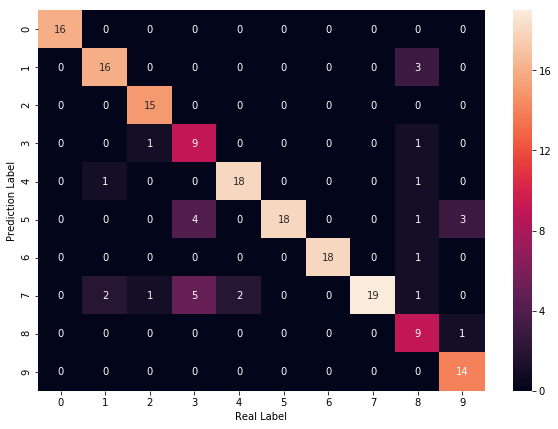

In [14]:
import seaborn as sn


df_cm = pd.DataFrame(cm, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)
plt.xlabel('Real Label')
plt.ylabel('Prediction Label')
plt.show()

In [15]:
list_P = []
for i,p_value in enumerate(pred_value):
    print("#{} min_error:{} index:{} real:{}".format(i, error_list[i], p_value[0], digits.target[1617+i]))

#0 min_error:22 index:[5] real:5
#1 min_error:29 index:[3] real:2
#2 min_error:30 index:[8] real:8
#3 min_error:7 index:[0] real:0
#4 min_error:21 index:[1] real:1
#5 min_error:8 index:[7] real:7
#6 min_error:12 index:[6] real:6
#7 min_error:22 index:[3] real:3
#8 min_error:10 index:[2] real:2
#9 min_error:20 index:[1] real:1
#10 min_error:25 index:[7] real:7
#11 min_error:27 index:[7] real:4
#12 min_error:13 index:[6] real:6
#13 min_error:26 index:[3] real:3
#14 min_error:22 index:[1] real:1
#15 min_error:31 index:[3] real:3
#16 min_error:29 index:[5] real:9
#17 min_error:19 index:[1] real:1
#18 min_error:21 index:[7] real:7
#19 min_error:7 index:[6] real:6
#20 min_error:34 index:[1 4] real:8
#21 min_error:10 index:[4] real:4
#22 min_error:26 index:[3] real:3
#23 min_error:26 index:[1] real:1
#24 min_error:9 index:[4] real:4
#25 min_error:12 index:[0] real:0
#26 min_error:11 index:[5] real:5
#27 min_error:25 index:[3] real:3
#28 min_error:24 index:[6] real:6
#29 min_error:25 index:[9]

In [16]:
pred_value = []
error_list = []

for j in range(1617):
    pred = []
    for i in range(necoc):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(10 - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )

list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
print("Testset acc:{}".format(np.sum(list_P == digits.target[:1617])/1617))
winner_fitness = []
for winner in winner_list:
    #print(winner.fitness)
    winner_fitness.append(winner.fitness)
print("Avg Base Learner:{}".format(np.mean(winner_fitness)))

Testset acc:0.8818800247371676
Avg Base Learner:0.8119789734075447


In [17]:
# program to check if there is exist a path between two vertices 
# of a graph 

from collections import defaultdict 

#This class represents a directed graph using adjacency list representation 
class Graph: 

	def __init__(self,vertices): 
		self.V= vertices #No. of vertices 
		self.graph = defaultdict(list) # default dictionary to store graph 

	# function to add an edge to graph 
	def addEdge(self,u,v): 
		self.graph[u].append(v) 
	
	# Use BFS to check path between s and d 
	def isReachable(self, s, d): 
		# Mark all the vertices as not visited 
		visited =[False]*(self.V) 

		# Create a queue for BFS 
		queue=[] 

		# Mark the source node as visited and enqueue it 
		queue.append(s) 
		visited[s] = True

		while queue: 

			#Dequeue a vertex from queue 
			n = queue.pop(0) 
			
			# If this adjacent node is the destination node, 
			# then return true 
			if n == d: 
				return True

			# Else, continue to do BFS 
			for i in self.graph[n]: 
				if visited[i] == False: 
					queue.append(i) 
					visited[i] = True
		# If BFS is complete without visited d 
		return False
    
    
def findAllPath(graph,start,end,path=[]):
    path = path +[start]
    if start == end:
        return [path]
 
    paths = [] #存储所有路径    
    for node in graph[start]:
        if node not in path:
            newpaths = findAllPath(graph,node,end,path) 
            for newpath in newpaths:
                paths.append(newpath)
    return paths

numbers = [*range(2)]
number_of_classification = len(numbers)

list_nodes_number = []
list_connection_number = []

for winner in winner_list:
    used_nodes = list(winner.nodes.keys())
    # create a dict for mapping 
    l1 = numbers + config.genome_config.input_keys + used_nodes[number_of_classification:]
    l2 = range(len(l1))
    dict_nodes = dict(zip(l1, l2))

    ### 将节点加入图
    g = Graph(len(l1))# inputs + outputs + used  
    # add connections in the graph
    for cg in winner.connections.values():
        if cg.enabled:
            g.addEdge(dict_nodes[cg.key[0]],dict_nodes[cg.key[1]])

    v = numbers
    list_connections = []
    for vi in v:
        for u in range(number_of_classification, len(config.genome_config.input_keys) + number_of_classification):
            list_connections.append(g.isReachable(u, vi))

    nodes_inputs = range(number_of_classification, number_of_classification+ 64)
    nodes_outputs = range(number_of_classification)
    nodes_mid = range(number_of_classification + 64, len(dict_nodes))

    # 找到所有输入和输出连接的路
    all_path = []
    for u in nodes_inputs:
        for v in nodes_outputs:
            path = findAllPath(g.graph, u, v)
            if path:
                all_path = all_path + path

    # 得到最长路，以及每个节点在哪个层级
    max_length = max([len(x) for x in all_path])
    nodes_tuples_list = []
    for path in all_path:
        #print(path)
        for node in path:
            nodes_tuples_list.append([node, path.index(node)])

    # 确定节点的层级（消除重复）       
    nodes_tuples_fixed_list = []
    for index in range(max_length):
        for nodes in nodes_tuples_list:
            node, node_index = nodes[0], nodes[1]
            if node_index == index: 
                if nodes not in nodes_tuples_fixed_list:
                    nodes_tuples_fixed_list.append(nodes)


    # 所有有连接的节点
    all_used_nodes = []
    for node in nodes_tuples_fixed_list:
        if node[0] not in all_used_nodes:
            all_used_nodes.append(node[0])

    # 确定节点的层级（最终确定）
    nodes_tuples_fixed_list_final = []

    for node in all_used_nodes:
        if node in nodes_inputs:
            nodes_tuples_fixed_list_final.append([node, 0])
        elif node in nodes_outputs:
            nodes_tuples_fixed_list_final.append([node, max_length - 1])
        else:
            list_node = []
            for nodes in nodes_tuples_fixed_list:
                if node == nodes[0]:
                    list_node.append(nodes)
            layer = 0
            for ele in list_node:
                # 删除重复项，取最大
                if ele[1] > layer:
                    layer = ele[1]
            nodes_tuples_fixed_list_final.append([node,layer])


    # 每个层级的节点合数
    length_of_layers = []
    number_of_nodes = 0
    for index in range(max_length):
        for nodes in nodes_tuples_fixed_list_final:
            node, node_index = nodes[0], nodes[1]
            if node_index == index: 
                number_of_nodes += 1
        length_of_layers.append(number_of_nodes)

    length_of_each_layer = []
    length_of_each_layer.append(length_of_layers[0])
    for i in range(1, max_length):
        length_of_each_layer.append(length_of_layers[i] - length_of_layers[i-1])

    # 输出每个层级的节点个数
    #print("length of each layers:", length_of_each_layer)

    # 所有端到端的路
    all_path_side2side = []
    for path in all_path:
        if len(path) == 2:
            all_path_side2side.append(path)
        else:
            for i in range(len(path)-1):
                all_path_side2side.append([path[i],path[i+1]])

    # 定义节点到绘图的字典
    dict_nodes_graph = dict()
    count_number_layer = [0] * max_length
    for nodes in nodes_tuples_fixed_list_final:
        node, layer = nodes
        dict_nodes_graph[node] = [count_number_layer[layer], layer]
        count_number_layer[layer] += 1
    list_nodes_number.append(np.sum(length_of_each_layer))
    list_connection_number.append(len(all_path_side2side))
    #print("Number of nodes:{} Number of connections:{}".format(np.sum(length_of_each_layer),len(all_path_side2side)))
print("Total nodes:{} Total connections::{}".format(np.sum(list_nodes_number), np.sum(list_connection_number)))

Total nodes:2081 Total connections::2595


In [18]:
def get_pred_real(i, j):
    winner_net = neat.nn.FeedForwardNetwork.create(winner_list[i], config)
    
    numbers = [*range(26)]
    class1 = classes[i]
    class2 = []
    class1_indexes = []
    class2_indexes = []
    
    test_X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[j]
    test_y = digits.target[j]

    list_y = [test_y]
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)


    testsamplesize = 1
    test_x_inputs =[tuple(test_X)]
    test_x_outputs = [tuple([c]) for c in class1_label + class2_label]

    outputs = []
    for xi in test_x_inputs:
        output = winner_net.activate(xi)
        outputs.append(output)

    px_outputs = softmax(np.array(outputs).reshape(testsamplesize, 2), axis=1)
    
    # the index of maximum in each line
    return px_outputs

In [19]:
from random import randint
pred_value = []
error_list = []

for j in range(1617,1617+180):
    pred = []
    for i in range(necoc):
        pred_outputs = get_pred_real(i, j)
        pred.append(pred_outputs)
    
    error = []
    for i in range(10):
        loss = 0
        for ii in range(len(pred)):
            #print(number_codes[0][ii], pred[ii][0])
            #print (pred[ii][0][number_codes[0][ii]])
            #loss += (1 - pred[ii][0][number_codes[i][ii]])**2
            z = pred[ii][0][number_codes[i][ii]]
            
            #loss += np.log(1 + np.exp(-z)) # c45
            #loss += np.exp(-z)# adaboost
            loss += (1-z)**2
        error.append(loss)
    
    pred_value.append(np.where(error==np.min(error)))

list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
np.sum(list_P == digits.target[1617:])/180

0.8166666666666667